Linear Regression Project

Made by: Juan Esteban Monsalve Castrillón

Source: https://www.kaggle.com/datasets/angeloftechml/realstaterentcolombia2021
(La data original fué modificada para la realización de este modelado)


Pre-Procesado: Se limpió la base de datos desde excel eliminando caracteres especiales o raros: Para esto:
1. Se limpiaron los caracteres extras de la columna details con Buscar y reemplazar (Ctrl + L). Y se le dio un formato de JSON
2. Para este JSON se creo un codigo aparte para pasarlo a columnas y asi tener las columnas de forma individual para proceder al procesamiento de los datos

#📚 Libraries Import

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Control de outliers
import numpy as np
from scipy.stats.mstats import winsorize
from sklearn.metrics import r2_score

In [ ]:
#Importe desde Google Drive
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


#🛠️ ETL

In [ ]:
#Cargamos el archivo
data = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/DataSistemasInteligentes/medellin-apartamento-arriendo-FR-details.xlsx")
data.head()

,Column1,lat,long,id,date,category,location,mode,price,details,...,Área privada en metro cuadrado,Área Construcción en metro cuadrado,Precio por metro cuadrado,Estrato,Antigüedad,Sector,Admón,Piso No,Estado,Tipo de Apartamento
0,15251,182998000000000,-986000000000000,4699482,2021-06-20,Apartamento,Medellín ALTOS DEL POBLADO,Arriendo,3500000,"['Área privada en metro cuadrado: 74,00', 'Áre...",...,"74,00","74,00",47.297,6.0,1 a 8 años,SurOriente,NaN,NaN,NaN,NaN
1,12092,306018000000000,-964000000000000,6009990,2021-06-20,Apartamento,Medellín San Diego,Arriendo,1800000,"['Área privada en metro cuadrado: 92,00', 'Áre...",...,"92,00","92,00",19.565,5.0,9 a 15 años,SurOriente,"$285,000",1,NaN,NaN
2,11756,30588200000000,-964000000000000,6048970,2021-06-20,Apartamento,Medellín El Poblado,Arriendo,2650000,"['Área privada en metro cuadrado: 104,00', 'Ár...",...,"104,00","104,00",25.481,6.0,16 a 30 años,SurOriente,"$300,000",4,NaN,NaN
3,5840,30588200000000,-964000000000000,6397276,2021-06-20,Apartamento,Medellín Santa Mónica,Arriendo,1000000,"['Área privada en metro cuadrado: 58,00', 'Áre...",...,"58,00","60,00",16.667,4.0,NaN,Occidente,NaN,1,NaN,NaN
4,15269,306873000000000,-881000000000000,3283733,2021-06-20,Apartamento,Medellín POBLADO,Arriendo,3000000,"['Área privada en metro cuadrado: 92,00', 'Áre...",...,"92,00","92,00",32.609,6.0,9 a 15 años,SurOriente,NaN,NaN,Bueno,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15367 entries, 0 to 15366
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Column1                              15367 non-null  int64         
 1   lat                                  15367 non-null  int64         
 2   long                                 15367 non-null  int64         
 3   id                                   15367 non-null  int64         
 4   date                                 15367 non-null  datetime64[ns]
 5   category                             15367 non-null  object        
 6   location                             15367 non-null  object        
 7   mode                                 15367 non-null  object        
 8   price                                15367 non-null  int64         
 9   details                              15367 non-null  object        
 10  descriptio

##📘 Data Dictionary

A continuación se describen las variables contenidas en el dataset:

| **Nombre de la Variable** | **Descripción**                                                                  | **Unidad de Medición**                          |
|-------------------------------------------|----------------------------------------------------------------------------------|-------------------------------------------------|
| `Column1`|  Índice adicional sin orden alguno                | Índice numérico                                 |
| `lat`                                      | Latitud geográfica del inmueble                                                  | Coordenada geográfica                           |
| `long`                                     | Longitud geográfica del inmueble                                                 | Coordenada geográfica                           |
| `id`                                       | Identificador único del inmueble                                                 | Identificador numérico                          |
| `date`                                     | Fecha y hora de publicación o recolección del dato                              | Fecha y hora (`YYYY-MM-DD HH:MM:SS`)            |
| `category`                                 | Categoría del inmueble (ej. apartamento, apartaestudio)                                     | Texto                                           |
| `location`                                 | Dirección o ubicación del inmueble                                               | Texto                                           |
| `mode`                                     | Tipo de transacción (arriendo)                                      | Texto                                           |
| `price`                                    | Precio total del inmueble                                                        | Pesos colombianos (COP)                         |
| `details`                                  | Información adicional sobre el inmueble                                          | Texto                                           |
| `description`                              | Descripción del anuncio del inmueble                                             | Texto                                           |
| `surface metro cuadrado`                   | Área total del inmueble                                                          | Metros cuadrados (m²)                                |
| `rooms`                                    | Número de habitaciones                                                           | Cantidad de habitaciones                        |
| `baths`                                    | Número de baños                                                                  | Cantidad de baños                               |
| `park`                                     | Número de parqueaderos                                                           | Cantidad de parqueaderos                        |
| `Área privada en metro cuadrado`           | Área privada del inmueble                                                        | Metros cuadrados (m²)                                |
| `Área Construcción en metro cuadrado`      | Área construida del inmueble                                                     | Metros cuadrados (m²)                                |
| `Precio por metro cuadrado`                | Valor por unidad de área                                                         | Pesos colombianos por metro cuadrado (COP/m²)   |
| `Estrato`                                  | Estrato socioeconómico del inmueble                                              | Nivel socioeconómico (1 a 6)                    |
| `Antigüedad`                               | Edad del inmueble                                                                | Años (puede requerir limpieza)                  |
| `Sector`                                   | Zona o sector donde se ubica el inmueble                                         | Texto                                           |
| `Admón`                                    | Valor mensual de administración                                                  | Pesos colombianos (COP)                         |
| `Piso No`                                  | Número de piso en el que se ubica el inmueble                                    | Número de piso                                  |
| `Estado`                                   | Estado del inmueble (ej. remodelar, bueno, excelente, etc.)                             | Texto                                           |
| `Tipo de Apartamento`                      | Tipo de apartamento (ej. pent-house, duplex, loft)                                  | Texto                                           |


In [ ]:
#Selecciono las variables que pueden ser utilizadas
#Se excluye Precio por metro cuadrado ya que es una medida que sale de otras y puede causar multicolinealidad
data = data[['category', 'location', 'price', 'rooms', 'baths', 'park', 'Área privada en metro cuadrado',
             'Área Construcción en metro cuadrado', 'Estrato', 'Piso No']]
data.head()

,category,location,price,rooms,baths,park,Área privada en metro cuadrado,Área Construcción en metro cuadrado,Estrato,Piso No
0,Apartamento,Medellín ALTOS DEL POBLADO,3500000,_x000D__x000D__x000D_2_x000D__x000D_,_x000D__x000D__x000D_2_x000D__x000D_,0\n,"74,00","74,00",6.0,NaN
1,Apartamento,Medellín San Diego,1800000,_x000D__x000D__x000D_3_x000D__x000D_,_x000D__x000D__x000D_2_x000D__x000D_,_x000D__x000D_1_x000D__x000D_,"92,00","92,00",5.0,1
2,Apartamento,Medellín El Poblado,2650000,_x000D__x000D__x000D_2_x000D__x000D_,_x000D__x000D__x000D_3_x000D__x000D_,_x000D__x000D_1_x000D__x000D_,"104,00","104,00",6.0,4
3,Apartamento,Medellín Santa Mónica,1000000,_x000D__x000D__x000D_3_x000D__x000D_,_x000D__x000D__x000D_2_x000D__x000D_,_x000D__x000D_0_x000D__x000D_,"58,00","60,00",4.0,1
4,Apartamento,Medellín POBLADO,3000000,_x000D__x000D__x000D_1_x000D__x000D_,_x000D__x000D__x000D_2_x000D__x000D_,_x000D__x000D_1_x000D__x000D_,"92,00","92,00",6.0,NaN


In [ ]:
data.columns = ['Categoria', 'Ubicación', 'Precio', 'Habitaciones', 'Baños', 'Parqueaderos',
                    'Área privada (m²)', 'Área Construcción (m²)',
                    'Estrato', 'Piso No']

#Muevo la variable que voy a predecir para el final que es el precio
data['Precio'] = data.pop('Precio')

data.head()

,Categoria,Ubicación,Habitaciones,Baños,Parqueaderos,Área privada (m²),Área Construcción (m²),Estrato,Piso No,Precio
0,Apartamento,Medellín ALTOS DEL POBLADO,_x000D__x000D__x000D_2_x000D__x000D_,_x000D__x000D__x000D_2_x000D__x000D_,0\n,"74,00","74,00",6.0,NaN,3500000
1,Apartamento,Medellín San Diego,_x000D__x000D__x000D_3_x000D__x000D_,_x000D__x000D__x000D_2_x000D__x000D_,_x000D__x000D_1_x000D__x000D_,"92,00","92,00",5.0,1,1800000
2,Apartamento,Medellín El Poblado,_x000D__x000D__x000D_2_x000D__x000D_,_x000D__x000D__x000D_3_x000D__x000D_,_x000D__x000D_1_x000D__x000D_,"104,00","104,00",6.0,4,2650000
3,Apartamento,Medellín Santa Mónica,_x000D__x000D__x000D_3_x000D__x000D_,_x000D__x000D__x000D_2_x000D__x000D_,_x000D__x000D_0_x000D__x000D_,"58,00","60,00",4.0,1,1000000
4,Apartamento,Medellín POBLADO,_x000D__x000D__x000D_1_x000D__x000D_,_x000D__x000D__x000D_2_x000D__x000D_,_x000D__x000D_1_x000D__x000D_,"92,00","92,00",6.0,NaN,3000000


In [ ]:
#Al pasarse desde excel ha quedado con saltos de linea representados como: _x000D_ , entonces se proceden a quitar
data['Habitaciones'] = data['Habitaciones'].astype(str).str.replace('_x000D_', '', regex=False).str.strip()
data['Baños'] = data['Baños'].astype(str).str.replace('_x000D_', '', regex=False).str.strip()
data['Parqueaderos'] = data['Parqueaderos'].astype(str).str.replace('_x000D_', '', regex=False).str.strip()
data.head()

,Categoria,Ubicación,Habitaciones,Baños,Parqueaderos,Área privada (m²),Área Construcción (m²),Estrato,Piso No,Precio
0,Apartamento,Medellín ALTOS DEL POBLADO,2,2,0,"74,00","74,00",6.0,NaN,3500000
1,Apartamento,Medellín San Diego,3,2,1,"92,00","92,00",5.0,1,1800000
2,Apartamento,Medellín El Poblado,2,3,1,"104,00","104,00",6.0,4,2650000
3,Apartamento,Medellín Santa Mónica,3,2,0,"58,00","60,00",4.0,1,1000000
4,Apartamento,Medellín POBLADO,1,2,1,"92,00","92,00",6.0,NaN,3000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15367 entries, 0 to 15366
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Categoria               15367 non-null  object 
 1   Ubicación               15367 non-null  object 
 2   Habitaciones            15367 non-null  object 
 3   Baños                   15367 non-null  object 
 4   Parqueaderos            15367 non-null  object 
 5   Área privada (m²)       10832 non-null  object 
 6   Área Construcción (m²)  15367 non-null  object 
 7   Estrato                 15344 non-null  float64
 8   Piso No                 7247 non-null   object 
 9   Precio                  15367 non-null  int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 1.2+ MB


##❌ Null and type control

In [ ]:
#Miro si hay null en mi df
print(data.isnull().sum())

Categoria                    0
Ubicación                    0
Habitaciones                 0
Baños                        0
Parqueaderos                 0
Área privada (m²)         4535
Área Construcción (m²)       0
Estrato                     23
Piso No                   8120
Precio                       0
dtype: int64


In [ ]:
# Elimina filas donde la columna 'Piso No' es null
data = data[data['Piso No'].notnull()]
print(data.isnull().sum())

Categoria                    0
Ubicación                    0
Habitaciones                 0
Baños                        0
Parqueaderos                 0
Área privada (m²)         3187
Área Construcción (m²)       0
Estrato                      0
Piso No                      0
Precio                       0
dtype: int64


In [ ]:
#Asignarle los datos de Área Construcción al Área privada ya que casi siempre son las misma
data['Área privada (m²)'] = data['Área privada (m²)'].fillna(
    data['Área Construcción (m²)'])

In [ ]:
columnas_float = ['Área privada (m²)',
            'Área Construcción (m²)']

for col in columnas_float:
    data[col] = (
        data[col]
        .astype(str)

        .str.replace('.', '', regex=False)
        .str.replace(',', '.', regex=False)
    )

#Luego convierto las variables que pueden o deben ser enteros
columnas_int = ['Habitaciones',
            'Baños',
            'Parqueaderos',
            'Piso No']

for col in columnas_int:
    data[col] = (
        data[col]
        .astype(str)
        .str.replace(',', '', regex=False)
        .str.replace('.', '', regex=False)
    )

In [ ]:
#Define las columnas con las que vamos a trabajar
total_columnas = columnas_int + columnas_float + ['Estrato'] + ['Precio']

for col in total_columnas:
    # Convertir a numérico, poniendo NaN donde no se pueda convertir
    data[col] = pd.to_numeric(data[col], errors='coerce')

#Muestro la cantidad de NaN
total_nulos = data.isna().sum().sum()
print(f"Total de valores NaN en todo el DataFrame: {total_nulos} \n")

# Elimino todas las filas que tengan NaN en cualquiera de esas columnas (es decir, datos no numéricos)
data = data.dropna(subset=total_columnas)

total_nulos_controlados = data.isna().sum().sum()
print(f"Total de valores NaN en todo el DataFrame luego del control: {total_nulos_controlados} \n")

data.info()

Total de valores NaN en todo el DataFrame: 1052 

Total de valores NaN en todo el DataFrame luego del control: 0 

<class 'pandas.core.frame.DataFrame'>
Index: 6195 entries, 1 to 15366
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Categoria               6195 non-null   object 
 1   Ubicación               6195 non-null   object 
 2   Habitaciones            6195 non-null   int64  
 3   Baños                   6195 non-null   int64  
 4   Parqueaderos            6195 non-null   float64
 5   Área privada (m²)       6195 non-null   float64
 6   Área Construcción (m²)  6195 non-null   float64
 7   Estrato                 6195 non-null   float64
 8   Piso No                 6195 non-null   float64
 9   Precio                  6195 non-null   int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 532.4+ KB


In [ ]:
data.head()

,Categoria,Ubicación,Habitaciones,Baños,Parqueaderos,Área privada (m²),Área Construcción (m²),Estrato,Piso No,Precio
1,Apartamento,Medellín San Diego,3,2,1.0,92.0,92.0,5.0,1.0,1800000
2,Apartamento,Medellín El Poblado,2,3,1.0,104.0,104.0,6.0,4.0,2650000
3,Apartamento,Medellín Santa Mónica,3,2,0.0,58.0,60.0,4.0,1.0,1000000
9,Apartamento,Medellín Calasanz,2,1,0.0,45.0,45.0,4.0,3.0,800000
10,Apartamento,Medellín El Poblado,5,4,2.0,166.0,166.0,6.0,5.0,2700000


##0️⃣ Zeros Control

In [ ]:
#Miro los datos en cero y datos nulos para tomar decisiones sobre la data a utilizar

columnas_con_ceros = data.columns[(data == 0).any()]

for columna in columnas_con_ceros:
    conteo_ceros = (data[columna] == 0).sum()
    print(f"Columna - {columna}: {conteo_ceros} ceros")

Columna - Habitaciones: 143 ceros
Columna - Baños: 8 ceros
Columna - Parqueaderos: 2670 ceros


In [ ]:
#Un apartamento sin baño es atipico, entonces se remueven
data = data[data['Baños'] != 0]

In [ ]:
#Miro cuantas filas quedaron luego de la limpieza
print(data.shape)

(6187, 10)


##🔺 Outliers Control

In [ ]:
data.describe()

,Habitaciones,Baños,Parqueaderos,Área privada (m²),Área Construcción (m²),Estrato,Piso No,Precio
count,6187.000000,6187.000000,6187.000000,6187.000000,6187.000000,6187.000000,6187.000000,6.187000e+03
mean,2.342654,1.995151,0.718119,97.421490,97.447094,4.495394,4.878455,2.695619e+06
std,1.138315,0.974112,0.745327,407.485976,407.454000,1.056642,3.606641,2.333965e+07
min,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.300000e+05
25%,2.000000,1.000000,0.000000,52.000000,52.000000,4.000000,2.000000,1.000000e+06
50%,2.000000,2.000000,1.000000,70.000000,70.000000,5.000000,4.000000,1.550000e+06
75%,3.000000,2.000000,1.000000,101.000000,101.000000,5.000000,6.000000,2.400000e+06
max,32.000000,16.000000,10.000000,24542.000000,24542.000000,6.000000,15.000000,1.250000e+09


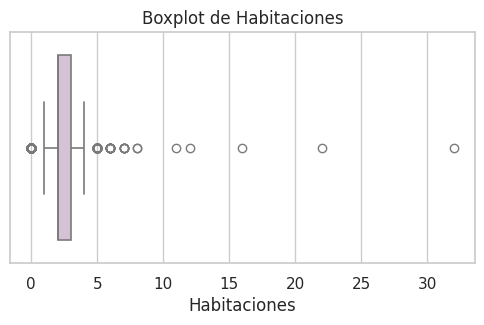

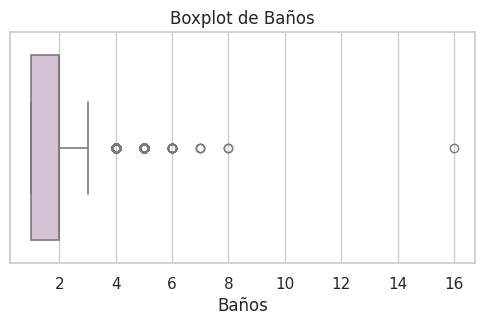

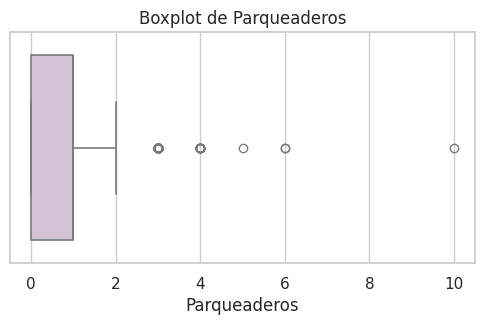

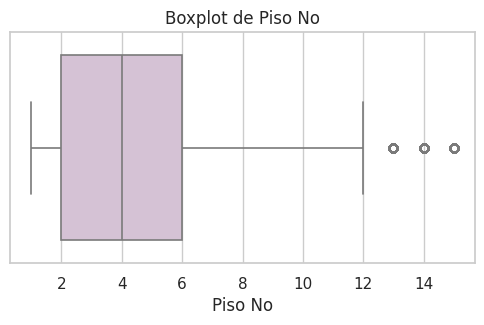

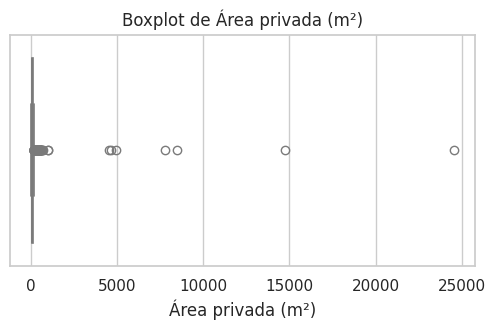

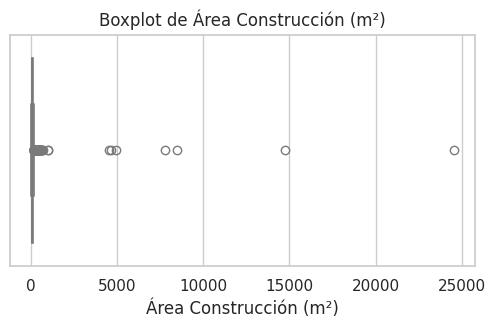

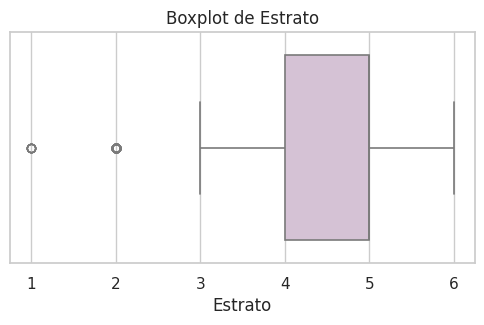

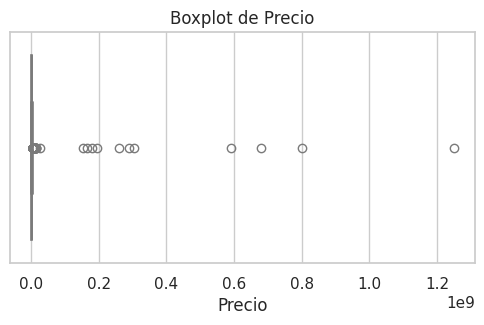

In [ ]:
#Gráfica para los outliers
for col in total_columnas:
    sns.set(style="whitegrid")
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=data[f'{col}'], color='#D8BFD8', linewidth=1.2)
    plt.title(f'Boxplot de {col}')
    plt.show()
    print("\n")


--- Procesando columna: Habitaciones ---
Límite inferior para outliers: 0.5
Límite superior para outliers: 4.5

Resumen estadístico original vs winsorizado:
       Habitaciones  Habitaciones_winsorized
count   6187.000000              6187.000000
mean       2.342654                 2.334088
std        1.138315                 0.924436
min        0.000000                 1.000000
25%        2.000000                 2.000000
50%        2.000000                 2.000000
75%        3.000000                 3.000000
max       32.000000                 4.000000


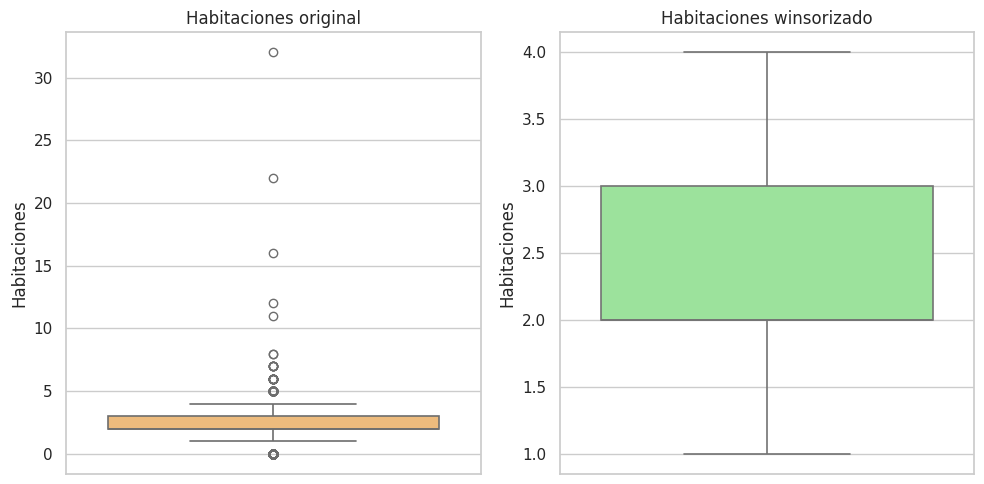


--- Procesando columna: Baños ---
Límite inferior para outliers: -0.5
Límite superior para outliers: 3.5

Resumen estadístico original vs winsorizado:
             Baños  Baños_winsorized
count  6187.000000       6187.000000
mean      1.995151          1.893486
std       0.974112          0.735767
min       1.000000          1.000000
25%       1.000000          1.000000
50%       2.000000          2.000000
75%       2.000000          2.000000
max      16.000000          3.000000


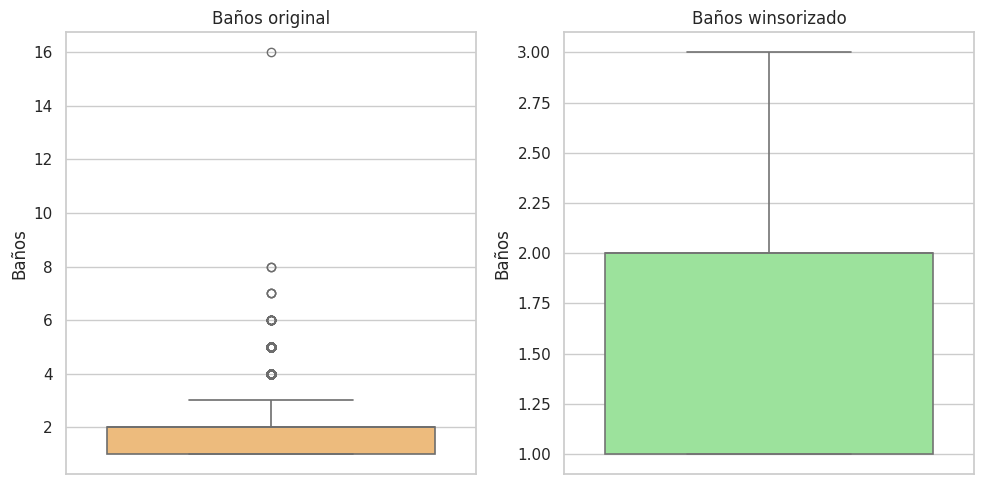


--- Procesando columna: Parqueaderos ---
Límite inferior para outliers: -1.5
Límite superior para outliers: 2.5

Resumen estadístico original vs winsorizado:
       Parqueaderos  Parqueaderos_winsorized
count   6187.000000              6187.000000
mean       0.718119                 0.699208
std        0.745327                 0.685543
min        0.000000                 0.000000
25%        0.000000                 0.000000
50%        1.000000                 1.000000
75%        1.000000                 1.000000
max       10.000000                 2.000000


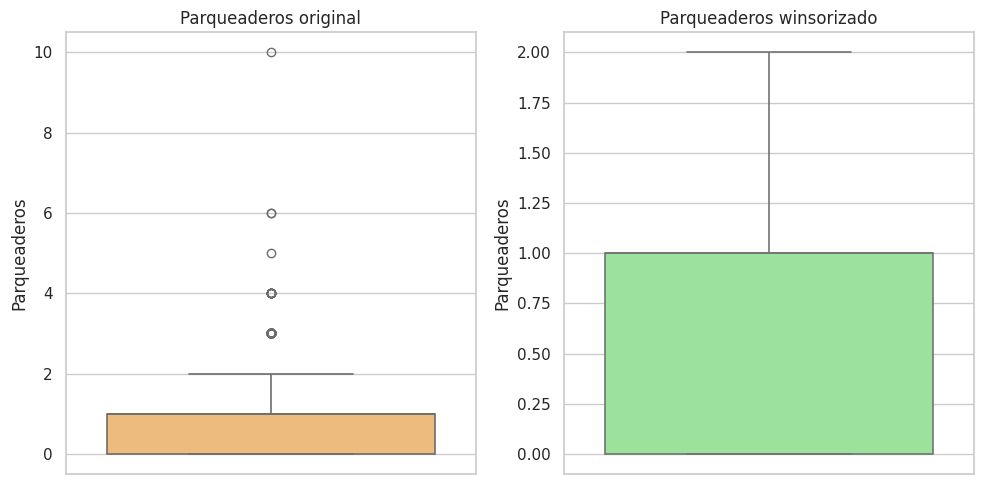


--- Procesando columna: Piso No ---
Límite inferior para outliers: -4.0
Límite superior para outliers: 12.0

Resumen estadístico original vs winsorizado:
           Piso No  Piso No_winsorized
count  6187.000000         6187.000000
mean      4.878455            4.766607
std       3.606641            3.338994
min       1.000000            1.000000
25%       2.000000            2.000000
50%       4.000000            4.000000
75%       6.000000            6.000000
max      15.000000           12.000000


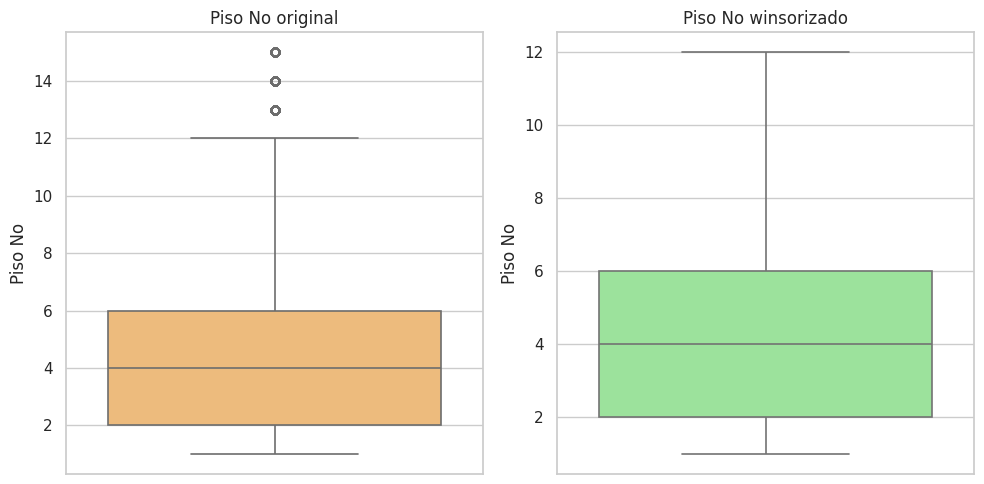


--- Procesando columna: Área privada (m²) ---
Límite inferior para outliers: -21.5
Límite superior para outliers: 174.5

Resumen estadístico original vs winsorizado:
       Área privada (m²)  Área privada (m²)_winsorized
count        6187.000000                   6187.000000
mean           97.421490                     81.244267
std           407.485976                     40.437758
min             1.000000                      1.000000
25%            52.000000                     52.000000
50%            70.000000                     70.000000
75%           101.000000                    101.000000
max         24542.000000                    174.000000


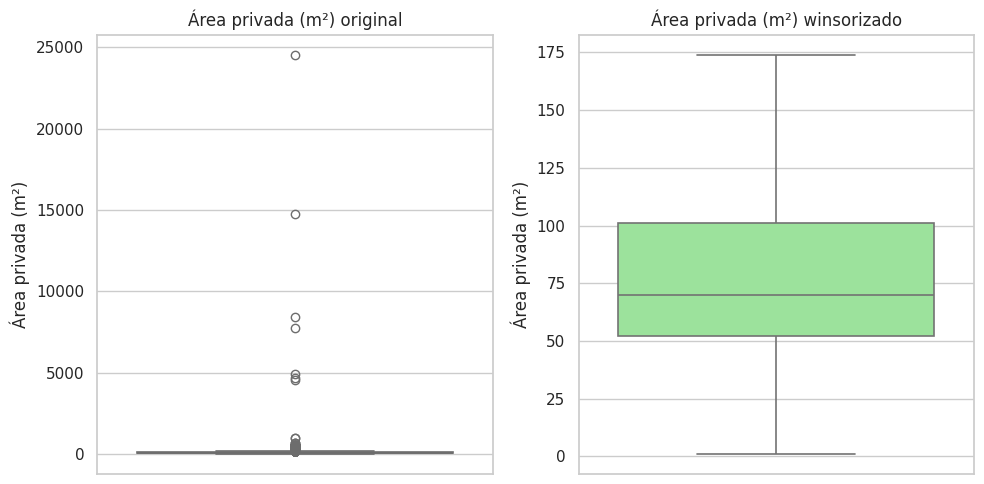


--- Procesando columna: Área Construcción (m²) ---
Límite inferior para outliers: -21.5
Límite superior para outliers: 174.5

Resumen estadístico original vs winsorizado:
       Área Construcción (m²)  Área Construcción (m²)_winsorized
count             6187.000000                        6187.000000
mean                97.447094                          81.303328
std                407.454000                          40.399456
min                  1.000000                           1.000000
25%                 52.000000                          52.000000
50%                 70.000000                          70.000000
75%                101.000000                         101.000000
max              24542.000000                         174.000000


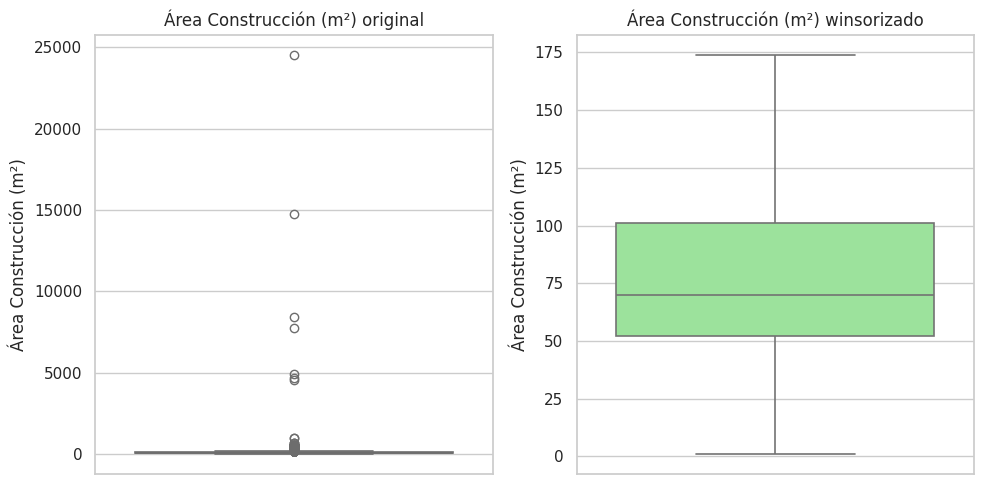


--- Procesando columna: Estrato ---
Límite inferior para outliers: 2.5
Límite superior para outliers: 6.5

Resumen estadístico original vs winsorizado:
           Estrato  Estrato_winsorized
count  6187.000000         6187.000000
mean      4.495394            4.511395
std       1.056642            1.024746
min       1.000000            3.000000
25%       4.000000            4.000000
50%       5.000000            5.000000
75%       5.000000            5.000000
max       6.000000            6.000000


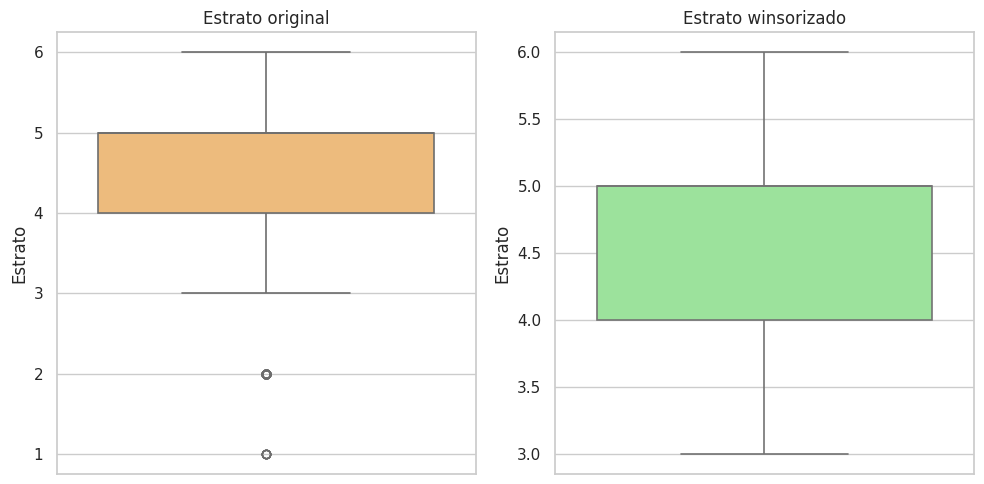


--- Procesando columna: Precio ---
Límite inferior para outliers: -1100000.0
Límite superior para outliers: 4500000.0

Resumen estadístico original vs winsorizado:
             Precio  Precio_winsorized
count  6.187000e+03       6.187000e+03
mean   2.695619e+06       1.812357e+06
std    2.333965e+07       1.003428e+06
min    2.300000e+05       2.300000e+05
25%    1.000000e+06       1.000000e+06
50%    1.550000e+06       1.550000e+06
75%    2.400000e+06       2.400000e+06
max    1.250000e+09       4.500000e+06


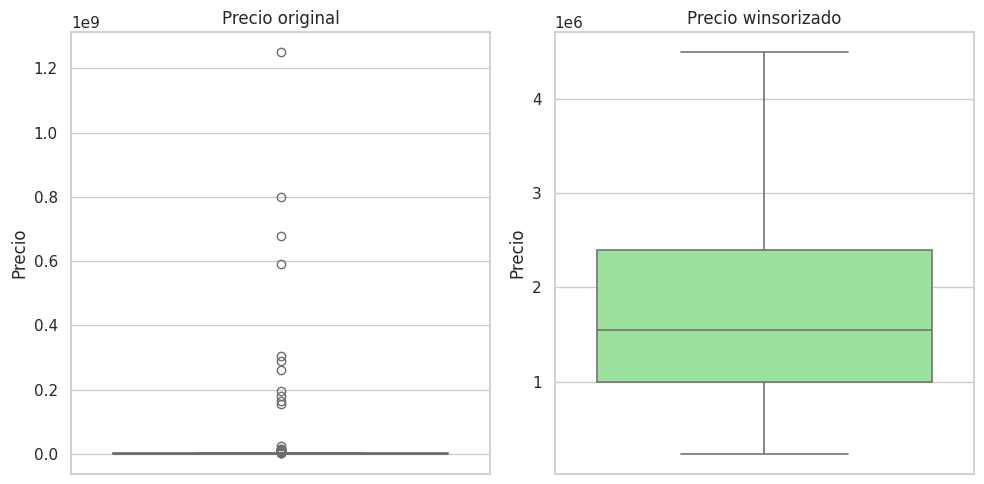

In [ ]:
#Función para winsorizar todo
def aplicar_winsorizing(data, columnas):
    for col in columnas:
        print(f"\n--- Procesando columna: {col} ---")

        # Calcular Q1, Q3 e IQR
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1

        # Calcular límites inferior y superior
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR

        print(f"Límite inferior para outliers: {lower_limit}")
        print(f"Límite superior para outliers: {upper_limit}")

        # Calcular proporciones de datos que serán winsorizados
        lower_prop = max(0, (data[col] < lower_limit).mean())
        upper_prop = max(0, (data[col] > upper_limit).mean())

        # Aplicar winsorización
        data[f'{col}_winsorized'] = winsorize(data[col], limits=(lower_prop, upper_prop))

        # Mostrar descripción estadística antes y después
        print("\nResumen estadístico original vs winsorizado:")
        print(data[[col, f'{col}_winsorized']].describe())


        #----------Para Crear el gráfico----------
        # Crear figura con dos subgráficas una al lado de la otra
        fig, axes = plt.subplots(1, 2, figsize=(10, 5))

        # Boxplot del precio original
        sns.boxplot(y=data[col], ax=axes[0], color='#ffbd6b', linewidth=1.2)
        axes[0].set_title(f'{col} original')
        axes[0].set_ylabel(f'{col}')

        # Boxplot del precio winsorizado
        sns.boxplot(y=data[f'{col}_winsorized'], ax=axes[1], color='lightgreen', linewidth=1.2)
        axes[1].set_title(f'{col} winsorizado')
        axes[1].set_ylabel(f'{col}')

        # Mostrar ambas gráficas
        plt.tight_layout()
        plt.show()

    return data

#Llamado a la función
data = aplicar_winsorizing(data, total_columnas)


In [ ]:
#Reinicio indices
data.reset_index(drop=True, inplace=True)

In [ ]:
data.tail()

,Categoria,Ubicación,Habitaciones,Baños,Parqueaderos,Área privada (m²),Área Construcción (m²),Estrato,Piso No,Precio,Habitaciones_winsorized,Baños_winsorized,Parqueaderos_winsorized,Piso No_winsorized,Área privada (m²)_winsorized,Área Construcción (m²)_winsorized,Estrato_winsorized,Precio_winsorized
6182,Apartamento,Medellín Poblado Patio Bonito,2,2,1.0,70.0,72.0,6.0,3.0,1800000,2,2,1.0,3.0,70.0,72.0,6.0,1800000
6183,Apartamento,Medellín Centro,2,1,0.0,60.0,60.0,4.0,4.0,800000,2,1,0.0,4.0,60.0,60.0,4.0,800000
6184,Apartamento,Medellín Medellín,2,3,2.0,170.0,170.0,2.0,3.0,8500000,2,3,2.0,3.0,170.0,170.0,3.0,4500000
6185,Apartamento,Medellín Loma de San Julian,2,2,1.0,77.0,77.0,5.0,3.0,1700000,2,2,1.0,3.0,77.0,77.0,5.0,1700000
6186,Apartamento,Medellín Belen,2,2,1.0,76.0,76.0,3.0,5.0,1300000,2,2,1.0,5.0,76.0,76.0,3.0,1300000


##↔️ Correlation analysis

###Data sin Winsorizar

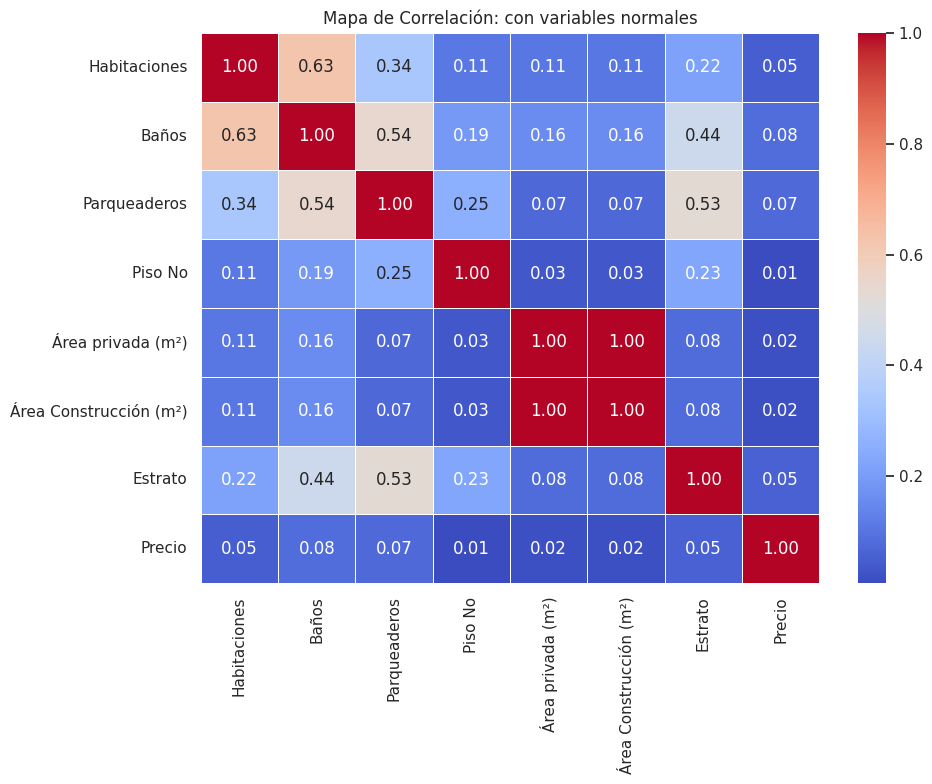

Habitaciones              0.048226
Baños                     0.084487
Parqueaderos              0.073888
Piso No                   0.007256
Área privada (m²)         0.016763
Área Construcción (m²)    0.016755
Estrato                   0.054342
Precio                    1.000000
Name: Precio, dtype: float64


In [ ]:
#Paso mi df ya creado con todas las columnas a mi data_subset
data_subset = data[total_columnas] #Con esto lo paso a lista

#matriz_correlacion = total_columnas.corr() #No usar directamente total_columnas = 'list' object has no attribute 'corr'
#Se crea la mtriz de correlacion y se muestra
matriz_correlacion = data_subset.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title("Mapa de Correlación: con variables normales")
plt.tight_layout()
plt.show()

print(matriz_correlacion['Precio'])

###Data Winsorizada

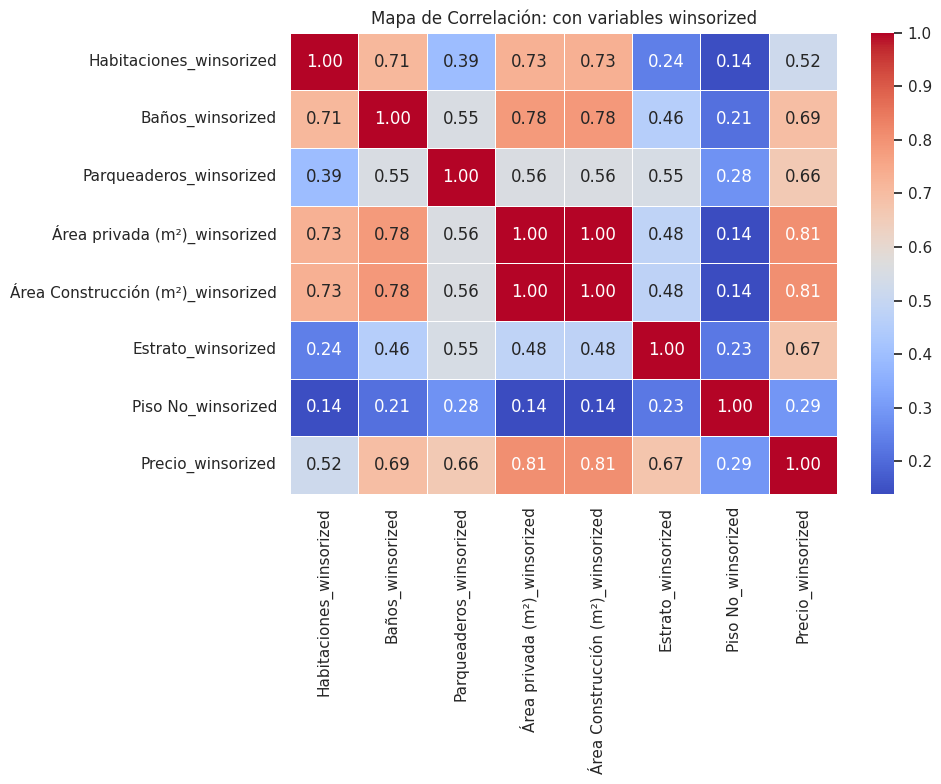

Habitaciones_winsorized              0.519105
Baños_winsorized                     0.694434
Parqueaderos_winsorized              0.663107
Área privada (m²)_winsorized         0.806358
Área Construcción (m²)_winsorized    0.806313
Estrato_winsorized                   0.674423
Piso No_winsorized                   0.291445
Precio_winsorized                    1.000000
Name: Precio_winsorized, dtype: float64


In [ ]:
#Paso mi df ya creado con todas las columnas a mi data_subset
variables_winsorized = [
    'Habitaciones_winsorized',
    'Baños_winsorized',
    'Parqueaderos_winsorized',
    'Área privada (m²)_winsorized',
    'Área Construcción (m²)_winsorized',
    'Estrato_winsorized',
    'Piso No_winsorized',
    'Precio_winsorized'
]

data_subset = data[variables_winsorized] #Con esto lo paso a lista

#matriz_correlacion = variables_winsorized.corr() #No usar directamente variables_winsorized = 'list' object has no attribute 'corr'
#Se crea la mtriz de correlacion y se muestra
matriz_correlacion = data_subset.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title("Mapa de Correlación: con variables winsorized")
plt.tight_layout()
plt.show()

print(matriz_correlacion['Precio_winsorized'])

Se excluye el 'piso' ya que no está tan correlacionado como las otras variables, ademas de 'Área privada (m²)_winsorized' ya que es lo mismo que la variable 'Área Construcción (m²)_winsorized' y esto puede afectar el modelo

#🤖 Modeling (ML)

##Regresión lineal simple

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
data_train = data.iloc[:6185]
data_test = data.iloc[6185::]

pendiente (m): 20026.713819088403
Intercepto de y (m): 184188.20587913995

Predicciones para 1500 y 2500 en Área Construcción (m²)_winsorized:
[3188195.2787424  4189530.96969682 5190866.66065124]




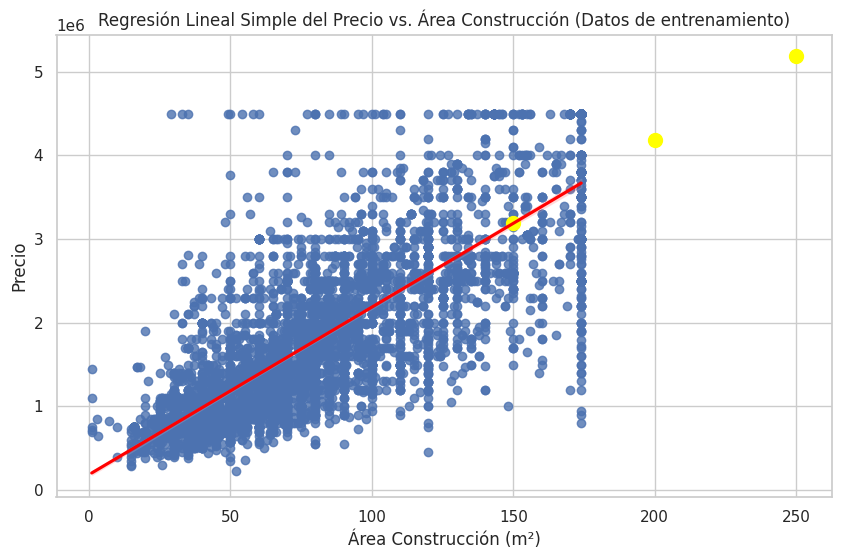

In [ ]:
#Se prerpara la variable independiente como matriz 2D. Para esto le pongo oble corchete
x = data_train[['Área Construcción (m²)_winsorized']]
y = data_train['Precio_winsorized']

x_test = data_test[['Área Construcción (m²)_winsorized']]
y_test = data_test['Precio_winsorized']


#Creo el modelo
modelo_lr = LinearRegression()

#Ajustar modelo a los datos
modelo_lr.fit(x,y)

#Se imprimen los resultados obtenidos
print(f'pendiente (m): {modelo_lr.coef_[0]}')
print(f'Intercepto de y (m): {modelo_lr.intercept_}')

#Predicciones realizada por el modelo
data_nueva = pd.DataFrame({'Área Construcción (m²)_winsorized': [150, 200, 250]})
predicciones = modelo_lr.predict(data_nueva)

#Predicciones para los datos en data_test
predicciones_test = modelo_lr.predict(x_test)


# Se imprimen los resultados obtenidos con la prediccion
print("\nPredicciones para 1500 y 2500 en Área Construcción (m²)_winsorized:")
print(predicciones)
print("\n")


plt.figure(figsize=(10, 6))
sns.regplot(x='Área Construcción (m²)_winsorized', y='Precio_winsorized', data=data, scatter_kws={'label': 'Datos reales'}, line_kws={'color': 'red', 'label': 'Regresión Lineal'})

# Añade etiquetas y título
plt.xlabel('Área Construcción (m²)')
plt.ylabel('Precio')
plt.title('Regresión Lineal Simple del Precio vs. Área Construcción (Datos de entrenamiento)')

# Grafica los puntos de las predicciones
plt.scatter(data_nueva['Área Construcción (m²)_winsorized'], predicciones, color='yellow', marker='o', s=100, label='Predicciones')

In [ ]:
precios_reales = y_test.tolist()

print("Resultados:")
print("-----------------------------")

suma_precisiones = 0
total = len(precios_reales)

for real, predicho in zip(precios_reales, predicciones_test):
    precision = 100 - (abs(real - predicho) / real * 100)
    suma_precisiones += precision
    print(f"Precio real: ${real:,.0f}")
    print(f"Precio predicho: ${predicho:,.2f}")
    print(f"Precisión: {precision:.2f}%")
    print("-----------------------------")

precision_promedio = suma_precisiones / total
print(f"✅ Precisión promedio del modelo: {precision_promedio:.2f}%")

Resultados:
-----------------------------
Precio real: $1,700,000
Precio predicho: $1,726,245.17
Precisión: 98.46%
-----------------------------
Precio real: $1,300,000
Precio predicho: $1,706,218.46
Precisión: 68.75%
-----------------------------
✅ Precisión promedio del modelo: 83.60%


##Regresion lineal múltiple

###Variables de mayor correlación

In [ ]:
import statsmodels.api as sm

In [ ]:
print(data.shape)

(6187, 18)


In [ ]:
data_train = data.iloc[:6185]
data_test = data.iloc[6185::]

In [ ]:
x_1 = data_train[['Habitaciones_winsorized',
    'Baños_winsorized',
    'Parqueaderos_winsorized',
    'Área Construcción (m²)_winsorized',
    'Estrato_winsorized']]
y_1 = data_train['Precio_winsorized']

In [ ]:
modelo_mlr1 = LinearRegression()
modelo_mlr1.fit(x_1, y_1)

LinearRegression()

In [ ]:
for columna in x_1.columns:
    # 1. Seleccionar la variable predictora individual
    variable_predictora = x_1[[columna]]

    # 2. Añadir una constante para el intercepto en la regresión simple
    variable_predictora_con_constante = sm.add_constant(variable_predictora)

    # 3. Ajustar el modelo de regresión lineal simple
    modelo_simple = sm.OLS(y_1, variable_predictora_con_constante).fit()

    # 4. Obtener el intercepto y la pendiente para esta variable
    intercepto_simple = modelo_simple.params['const']
    pendiente_simple = modelo_simple.params[columna]

    # 5. Imprimir los resultados
    print(f"Variable: {columna:<35} | Intercepto: {intercepto_simple:>10.4f} | Pendiente: {pendiente_simple:>10.4f}")

Variable: Habitaciones_winsorized             | Intercepto: 497263.5809 | Pendiente: 563446.4364
Variable: Baños_winsorized                    | Intercepto: 19197.5718 | Pendiente: 947085.1736
Variable: Parqueaderos_winsorized             | Intercepto: 1133820.6055 | Pendiente: 970714.8486
Variable: Área Construcción (m²)_winsorized   | Intercepto: 184188.2059 | Pendiente: 20026.7138
Variable: Estrato_winsorized                  | Intercepto: -1167603.4404 | Pendiente: 660538.9453


In [ ]:
x_1test = data_test[['Habitaciones_winsorized',
    'Baños_winsorized',
    'Parqueaderos_winsorized',
    'Área Construcción (m²)_winsorized',
    'Estrato_winsorized']]
y_1test = data_test['Precio_winsorized']

In [ ]:
predicciones_mlr1 = modelo_mlr1.predict(x_1test)
precios_reales = y_1test.tolist()

print("Resultados:")
print("-----------------------------")

suma_precisiones = 0
total = len(precios_reales)

for real, predicho in zip(precios_reales, predicciones_mlr1):
    precision = 100 - (abs(real - predicho) / real * 100)
    suma_precisiones += precision
    print(f"Precio real: ${real:,.0f}")
    print(f"Precio predicho: ${predicho:,.2f}")
    print(f"Precisión: {precision:.2f}%")
    print("-----------------------------")

precision_promedio = suma_precisiones / total
print(f"✅ Precisión promedio del modelo: {precision_promedio:.2f}%")

Resultados:
-----------------------------
Precio real: $1,700,000
Precio predicho: $2,014,305.45
Precisión: 81.51%
-----------------------------
Precio real: $1,300,000
Precio predicho: $1,437,568.79
Precisión: 89.42%
-----------------------------
✅ Precisión promedio del modelo: 85.46%


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6187 entries, 0 to 6186
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Categoria                          6187 non-null   object 
 1   Ubicación                          6187 non-null   object 
 2   Habitaciones                       6187 non-null   int64  
 3   Baños                              6187 non-null   int64  
 4   Parqueaderos                       6187 non-null   float64
 5   Área privada (m²)                  6187 non-null   float64
 6   Área Construcción (m²)             6187 non-null   float64
 7   Estrato                            6187 non-null   float64
 8   Piso No                            6187 non-null   float64
 9   Precio                             6187 non-null   int64  
 10  Habitaciones_winsorized            6187 non-null   int64  
 11  Baños_winsorized                   6187 non-null   int64

In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 6185 to 6186
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Categoria                          2 non-null      object 
 1   Ubicación                          2 non-null      object 
 2   Habitaciones                       2 non-null      int64  
 3   Baños                              2 non-null      int64  
 4   Parqueaderos                       2 non-null      float64
 5   Área privada (m²)                  2 non-null      float64
 6   Área Construcción (m²)             2 non-null      float64
 7   Estrato                            2 non-null      float64
 8   Piso No                            2 non-null      float64
 9   Precio                             2 non-null      int64  
 10  Habitaciones_winsorized            2 non-null      int64  
 11  Baños_winsorized                   2 non-null      int64

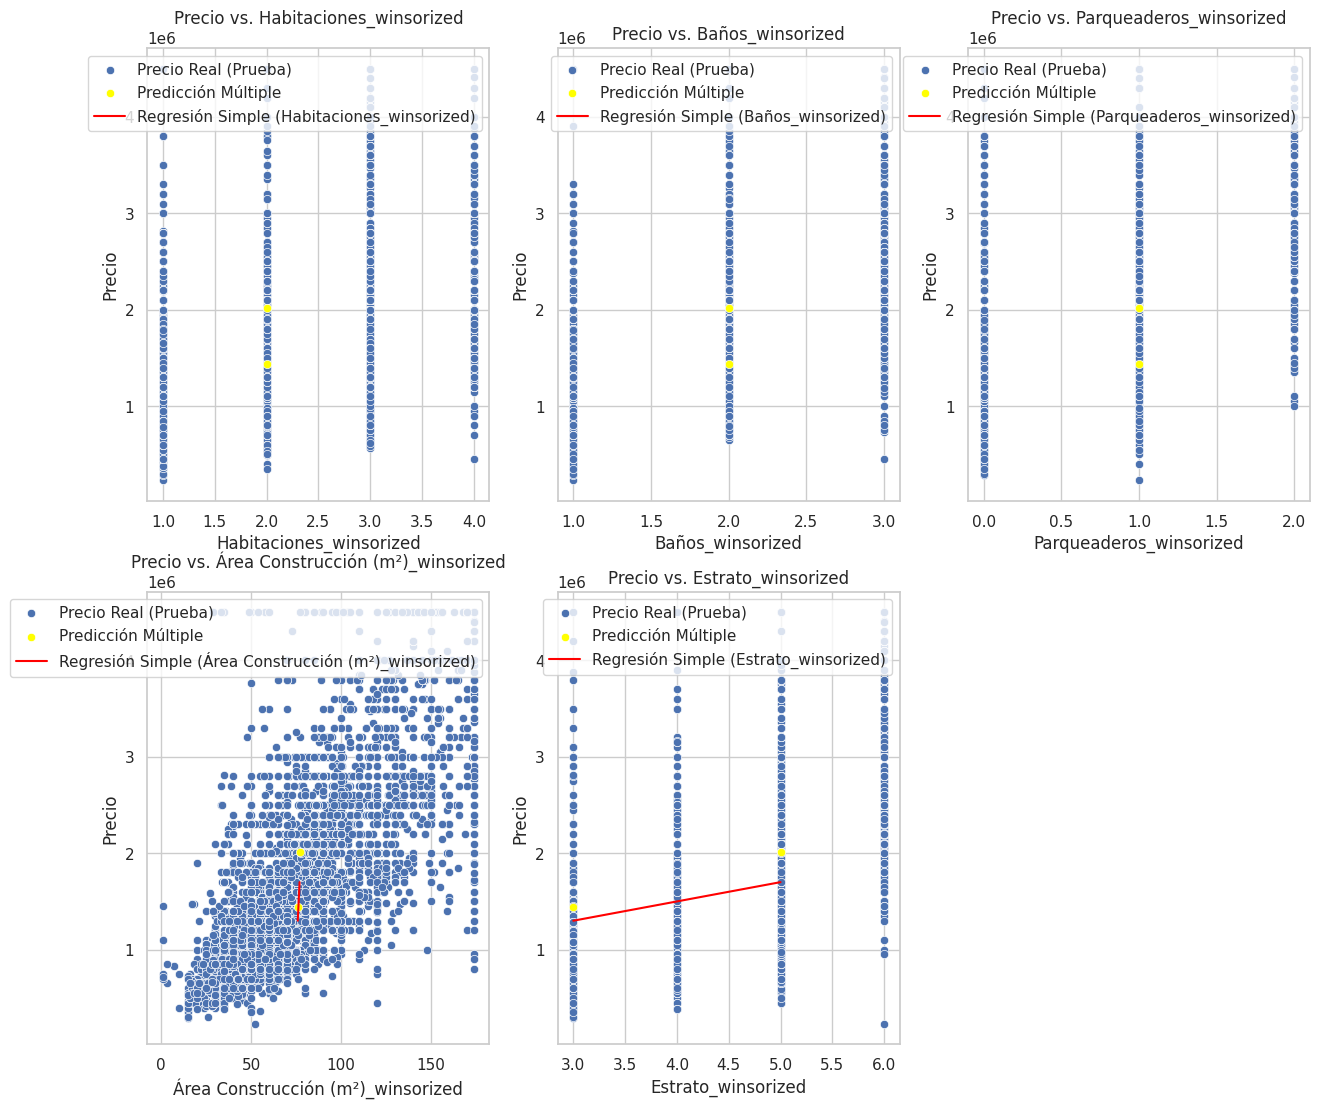

In [ ]:
#Gráfico de regresion linela múltiple con variables de mayor correlación
num_cols = len(x_1test.columns)
num_filas = 3
num_cols_por_fila = 3
total_subplots = num_filas * num_cols_por_fila

fig, axes = plt.subplots(num_filas, num_cols_por_fila, figsize=(15, 20))

for i, col in enumerate(x_1test.columns):
    fila = i // num_cols_por_fila
    columna = i % num_cols_por_fila
    ax = axes[fila, columna]

    sns.scatterplot(x=x_1[col], y=y_1, ax=ax, label='Precio Real (Prueba)')

    sns.scatterplot(x=x_1test[col], y=predicciones_mlr1, ax=ax, color='yellow', marker='o', label='Predicción Múltiple')

     # Ensure x_range is based on the test data range for plotting purposes
    x_range = np.linspace(x_1test[col].min(), x_1test[col].max())

    # Create a DataFrame with the correct column name for prediction
    x_range_df = pd.DataFrame({col: x_range})

    # Fit the simple model on the test data for plotting the simple regression line
    modelo_simple = sm.OLS(y_1test, sm.add_constant(x_1test[col])).fit()

    # Predict using the correctly structured DataFrame with constant
    y_pred_line = modelo_simple.predict(sm.add_constant(x_range_df, prepend=True)) # Use prepend=True explicitly

    ax.plot(x_range, y_pred_line, color='red', linestyle='-', label=f'Regresión Simple ({col})')


    ax.set_title(f'Precio vs. {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Precio')
    ax.legend()

# Ocultar los subplots vacíos si es necesario
if num_cols < total_subplots:
    for j in range(num_cols, total_subplots):
        fila = j // num_cols_por_fila
        columna = j % num_cols_por_fila
        fig.delaxes(axes[fila, columna])

###Data completa

In [ ]:
print(data.shape)

(6187, 18)


In [ ]:
data_train = data.iloc[:6185]
data_test = data.iloc[6185::]

In [ ]:
x_1_complete = data_train[[
    'Habitaciones_winsorized',
    'Baños_winsorized',
    'Parqueaderos_winsorized',
    'Área privada (m²)_winsorized',
    'Área Construcción (m²)_winsorized',
    'Estrato_winsorized',
    'Piso No_winsorized'
]]
y_1_complete = data_train['Precio_winsorized']

In [ ]:
modelo_mlr2 = LinearRegression()
modelo_mlr2.fit(x_1_complete, y_1_complete)

LinearRegression()

In [ ]:
for columna in x_1_complete.columns:
    # 1. Seleccionar la variable predictora individual
    variable_predictora = x_1_complete[[columna]]

    # 2. Añadir una constante para el intercepto en la regresión simple
    variable_predictora_con_constante = sm.add_constant(variable_predictora)

    # 3. Ajustar el modelo de regresión lineal simple
    modelo_simple = sm.OLS(y_1_complete, variable_predictora_con_constante).fit()

    # 4. Obtener el intercepto y la pendiente para esta variable
    intercepto_simple = modelo_simple.params['const']
    pendiente_simple = modelo_simple.params[columna]

    # 5. Imprimir los resultados
    print(f"Variable: {columna:<35} | Intercepto: {intercepto_simple:>10.4f} | Pendiente: {pendiente_simple:>10.4f}")

Variable: Habitaciones_winsorized             | Intercepto: 497263.5809 | Pendiente: 563446.4364
Variable: Baños_winsorized                    | Intercepto: 19197.5718 | Pendiente: 947085.1736
Variable: Parqueaderos_winsorized             | Intercepto: 1133820.6055 | Pendiente: 970714.8486
Variable: Área privada (m²)_winsorized        | Intercepto: 186821.1534 | Pendiente: 20008.8696
Variable: Área Construcción (m²)_winsorized   | Intercepto: 184188.2059 | Pendiente: 20026.7138
Variable: Estrato_winsorized                  | Intercepto: -1167603.4404 | Pendiente: 660538.9453
Variable: Piso No_winsorized                  | Intercepto: 1394940.9808 | Pendiente: 87587.4736


In [ ]:
x_1_complete_test = data_test[[
    'Habitaciones_winsorized',
    'Baños_winsorized',
    'Parqueaderos_winsorized',
    'Área privada (m²)_winsorized',
    'Área Construcción (m²)_winsorized',
    'Estrato_winsorized',
    'Piso No_winsorized'
]]
y_1_complete_test = data_test['Precio_winsorized']

In [ ]:
predicciones_mlr2 = modelo_mlr2.predict(x_1_complete_test)
precios_reales = y_1_complete_test.tolist()

print("Resultados:")
print("-----------------------------")

suma_precisiones = 0
total = len(precios_reales)

for real, predicho in zip(precios_reales, predicciones_mlr2):
    precision = 100 - (abs(real - predicho) / real * 100)
    suma_precisiones += precision
    print(f"Precio real: ${real:,.0f}")
    print(f"Precio predicho: ${predicho:,.2f}")
    print(f"Precisión: {precision:.2f}%")
    print("-----------------------------")

precision_promedio = suma_precisiones / total
print(f"✅ Precisión promedio del modelo: {precision_promedio:.2f}%")

Resultados:
-----------------------------
Precio real: $1,700,000
Precio predicho: $1,941,775.83
Precisión: 85.78%
-----------------------------
Precio real: $1,300,000
Precio predicho: $1,453,614.65
Precisión: 88.18%
-----------------------------
✅ Precisión promedio del modelo: 86.98%


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6187 entries, 0 to 6186
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Categoria                          6187 non-null   object 
 1   Ubicación                          6187 non-null   object 
 2   Habitaciones                       6187 non-null   int64  
 3   Baños                              6187 non-null   int64  
 4   Parqueaderos                       6187 non-null   float64
 5   Área privada (m²)                  6187 non-null   float64
 6   Área Construcción (m²)             6187 non-null   float64
 7   Estrato                            6187 non-null   float64
 8   Piso No                            6187 non-null   float64
 9   Precio                             6187 non-null   int64  
 10  Habitaciones_winsorized            6187 non-null   int64  
 11  Baños_winsorized                   6187 non-null   int64

In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 6185 to 6186
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Categoria                          2 non-null      object 
 1   Ubicación                          2 non-null      object 
 2   Habitaciones                       2 non-null      int64  
 3   Baños                              2 non-null      int64  
 4   Parqueaderos                       2 non-null      float64
 5   Área privada (m²)                  2 non-null      float64
 6   Área Construcción (m²)             2 non-null      float64
 7   Estrato                            2 non-null      float64
 8   Piso No                            2 non-null      float64
 9   Precio                             2 non-null      int64  
 10  Habitaciones_winsorized            2 non-null      int64  
 11  Baños_winsorized                   2 non-null      int64

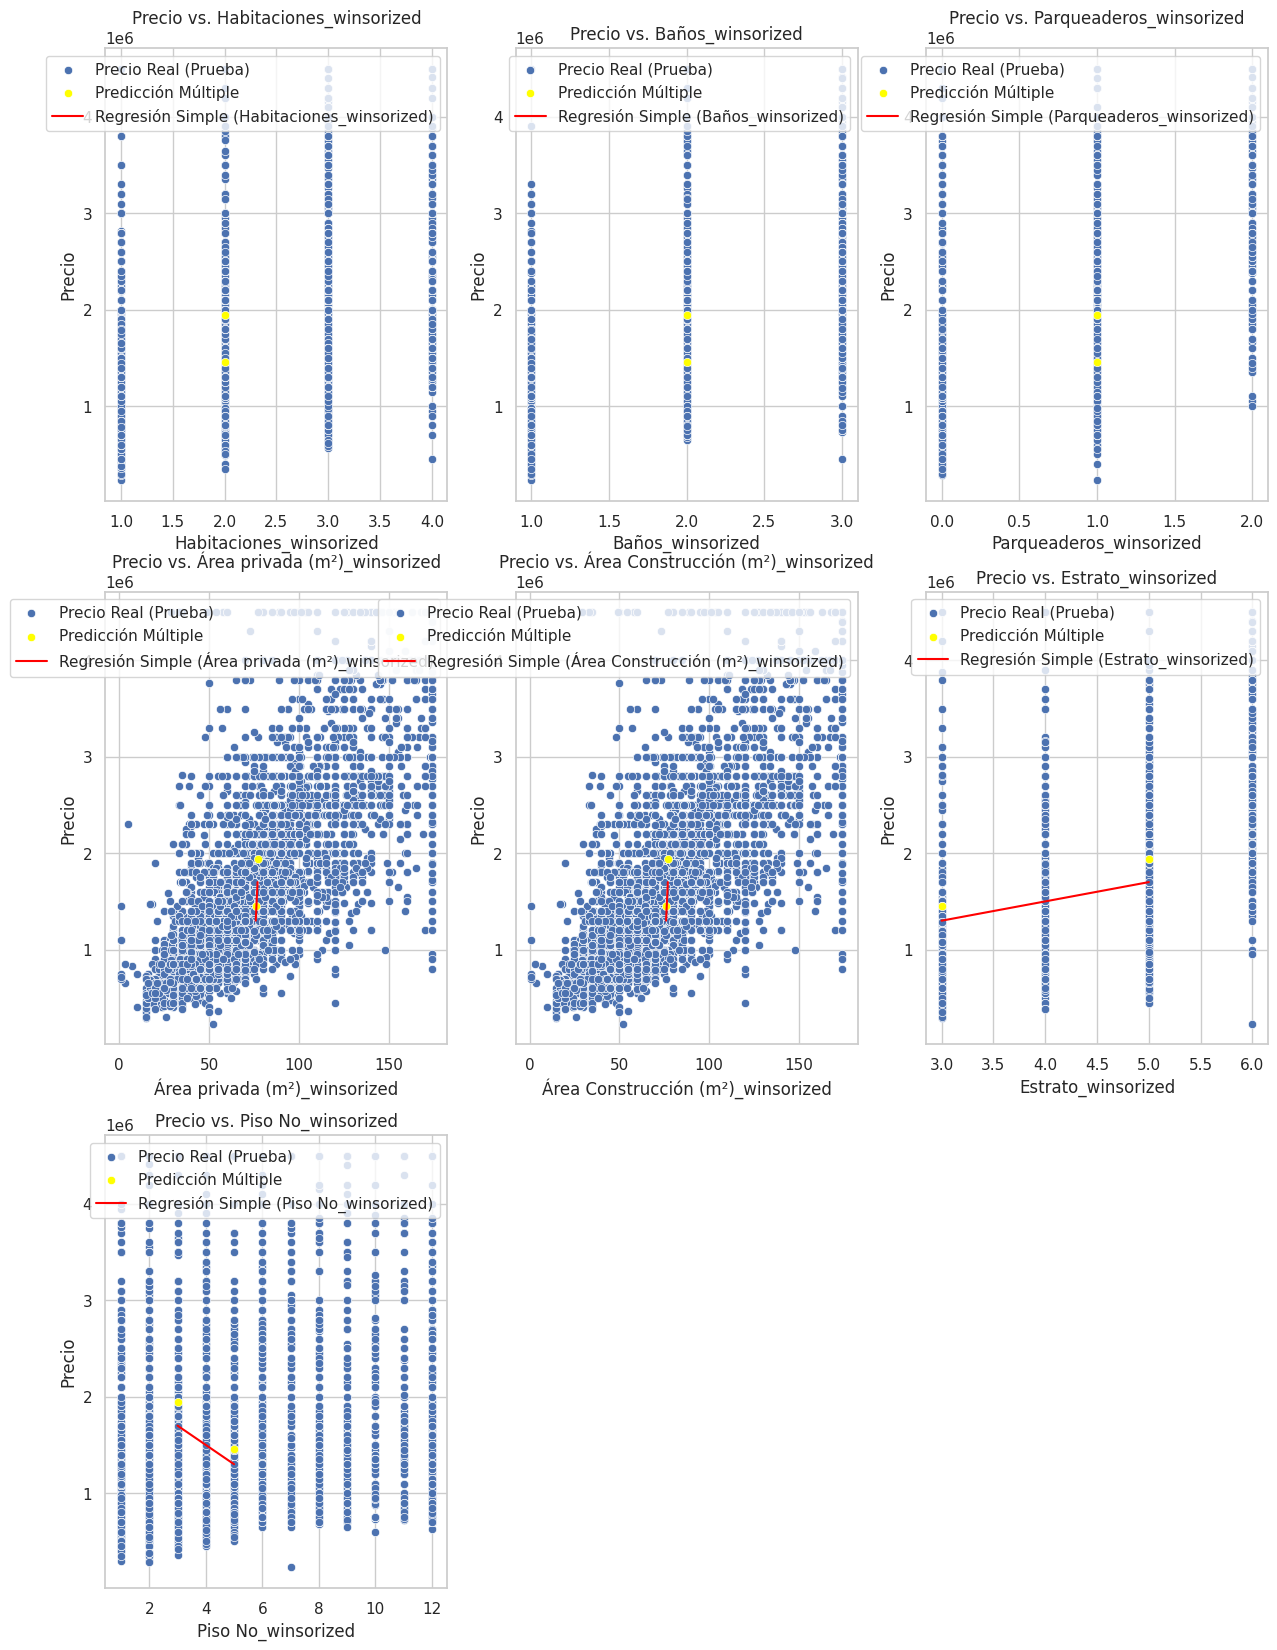

In [ ]:
#Gráfico de regresion lineal múltiple con toda la data completa
num_cols = len(x_1_complete_test.columns)
num_filas = 3
num_cols_por_fila = 3
total_subplots = num_filas * num_cols_por_fila

fig, axes = plt.subplots(num_filas, num_cols_por_fila, figsize=(15, 20))

for i, col in enumerate(x_1_complete_test.columns):
    fila = i // num_cols_por_fila
    columna = i % num_cols_por_fila
    ax = axes[fila, columna]

    sns.scatterplot(x=x_1_complete[col], y=y_1_complete, ax=ax, label='Precio Real (Prueba)')

    sns.scatterplot(x=x_1_complete_test[col], y=predicciones_mlr2, ax=ax, color='yellow', marker='o', label='Predicción Múltiple')

    # modelo_simple = sm.OLS(y_1test, sm.add_constant(x_1test[col])).fit()
    # x_range = np.linspace(x_1[col].min(), x_1[col].max(), 100)
    # y_pred_line = modelo_simple.predict(sm.add_constant(pd.Series(x_range)))
    # ax.plot(x_range, y_pred_line, color='red', linestyle='-', label=f'Regresión Simple ({col})')




     # Ensure x_range is based on the test data range for plotting purposes
    x_range = np.linspace(x_1_complete_test[col].min(), x_1_complete_test[col].max())

    # Create a DataFrame with the correct column name for prediction
    x_range_df = pd.DataFrame({col: x_range})

    # Fit the simple model on the test data for plotting the simple regression line
    modelo_simple = sm.OLS(y_1_complete_test, sm.add_constant(x_1_complete_test[col])).fit()

    # Predict using the correctly structured DataFrame with constant
    y_pred_line = modelo_simple.predict(sm.add_constant(x_range_df, prepend=True)) # Use prepend=True explicitly

    ax.plot(x_range, y_pred_line, color='red', linestyle='-', label=f'Regresión Simple ({col})')


    ax.set_title(f'Precio vs. {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Precio')
    ax.legend()

# Ocultar los subplots vacíos si es necesario
if num_cols < total_subplots:
    for j in range(num_cols, total_subplots):
        fila = j // num_cols_por_fila
        columna = j % num_cols_por_fila
        fig.delaxes(axes[fila, columna])

##Regresión RANSAC

###Variables con mayor correlación

In [ ]:
from sklearn.linear_model import LinearRegression, RANSACRegressor

In [ ]:
#Definimos variables independientes ydependientes
x_2 = data_train[['Habitaciones_winsorized',
    'Baños_winsorized',
    'Parqueaderos_winsorized',
    'Área Construcción (m²)_winsorized',
    'Estrato_winsorized']]
y_2 = data_train['Precio_winsorized']

In [ ]:
modelo_ransac = RANSACRegressor(estimator=LinearRegression())
modelo_ransac.fit(x_2, y_2)

RANSACRegressor(estimator=LinearRegression())

In [ ]:
x_2test = data_test[['Habitaciones_winsorized',
    'Baños_winsorized',
    'Parqueaderos_winsorized',
    'Área Construcción (m²)_winsorized',
    'Estrato_winsorized']]
y_2test = data_test['Precio_winsorized']

In [ ]:
#Graficar el modelo
predicciones_ransac = modelo_ransac.predict(x_2test)

In [ ]:
precios_reales = y_2test.tolist()

print("Resultados:")
print("-----------------------------")

suma_precisiones = 0
total = len(precios_reales)

for real, predicho in zip(precios_reales, predicciones_ransac):
    precision = 100 - (abs(real - predicho) / real * 100)
    suma_precisiones += precision
    print(f"Precio real: ${real:,.0f}")
    print(f"Precio predicho: ${predicho:,.2f}")
    print(f"Precisión: {precision:.2f}%")
    print("-----------------------------")

precision_promedio = suma_precisiones / total
print(f"✅ Precisión promedio del modelo: {precision_promedio:.2f}%")

Resultados:
-----------------------------
Precio real: $1,700,000
Precio predicho: $1,793,495.04
Precisión: 94.50%
-----------------------------
Precio real: $1,300,000
Precio predicho: $1,419,788.16
Precisión: 90.79%
-----------------------------
✅ Precisión promedio del modelo: 92.64%


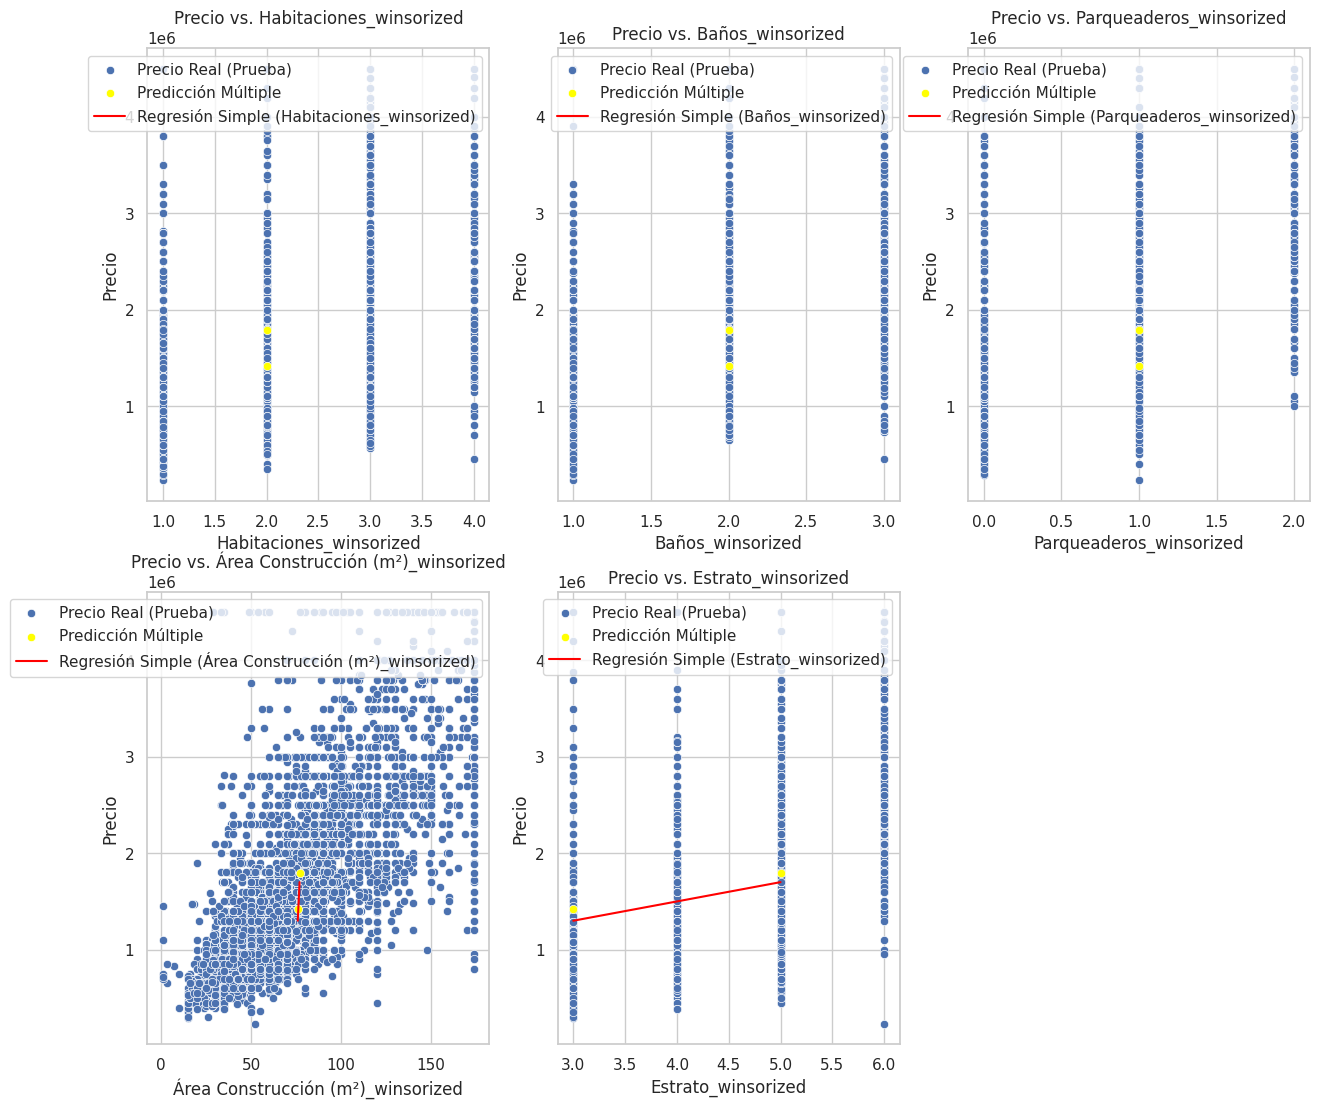

In [ ]:
#Gráfico de regresion RANSAC con variables de mayor correlación
num_cols = len(x_2test.columns)
num_filas = 3
num_cols_por_fila = 3
total_subplots = num_filas * num_cols_por_fila

fig, axes = plt.subplots(num_filas, num_cols_por_fila, figsize=(15, 20))

for i, col in enumerate(x_2test.columns):
    fila = i // num_cols_por_fila
    columna = i % num_cols_por_fila
    ax = axes[fila, columna]

    sns.scatterplot(x=x_2[col], y=y_2, ax=ax, label='Precio Real (Prueba)')

    sns.scatterplot(x=x_2test[col], y=predicciones_ransac, ax=ax, color='yellow', marker='o', label='Predicción Múltiple')

     # Ensure x_range is based on the test data range for plotting purposes
    x_range = np.linspace(x_2test[col].min(), x_2test[col].max(), 100)

    # Create a DataFrame with the correct column name for prediction
    x_range_df = pd.DataFrame({col: x_range})

    # Fit the simple model on the test data for plotting the simple regression line
    modelo_simple = sm.OLS(y_2test, sm.add_constant(x_2test[col])).fit()

    # Predict using the correctly structured DataFrame with constant
    y_pred_line = modelo_simple.predict(sm.add_constant(x_range_df, prepend=True)) # Use prepend=True explicitly

    ax.plot(x_range, y_pred_line, color='red', linestyle='-', label=f'Regresión Simple ({col})')


    ax.set_title(f'Precio vs. {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Precio')
    ax.legend()

# Ocultar los subplots vacíos si es necesario
if num_cols < total_subplots:
    for j in range(num_cols, total_subplots):
        fila = j // num_cols_por_fila
        columna = j % num_cols_por_fila
        fig.delaxes(axes[fila, columna])

###Data completa

In [ ]:
#Definimos variables independientes ydependientes
x_2_complete = data_train[[
    'Habitaciones_winsorized',
    'Baños_winsorized',
    'Parqueaderos_winsorized',
    'Área privada (m²)_winsorized',
    'Área Construcción (m²)_winsorized',
    'Estrato_winsorized',
    'Piso No_winsorized']]
y_2_complete = data_train['Precio_winsorized']

In [ ]:
modelo_ransac2 = RANSACRegressor(estimator=LinearRegression())
modelo_ransac2.fit(x_2_complete, y_2_complete)

RANSACRegressor(estimator=LinearRegression())

In [ ]:
x_2_complete_test = data_test[[
    'Habitaciones_winsorized',
    'Baños_winsorized',
    'Parqueaderos_winsorized',
    'Área privada (m²)_winsorized',
    'Área Construcción (m²)_winsorized',
    'Estrato_winsorized',
    'Piso No_winsorized']]
y_2_complete_test = data_test['Precio_winsorized']

In [ ]:
#Graficar el modelo
predicciones_ransac2 = modelo_ransac2.predict(x_2_complete_test)

In [ ]:
precios_reales = y_2_complete_test.tolist()

print("Resultados:")
print("-----------------------------")

suma_precisiones = 0
total = len(precios_reales)

for real, predicho in zip(precios_reales, predicciones_ransac2):
    precision = 100 - (abs(real - predicho) / real * 100)
    suma_precisiones += precision
    print(f"Precio real: ${real:,.0f}")
    print(f"Precio predicho: ${predicho:,.2f}")
    print(f"Precisión: {precision:.2f}%")
    print("-----------------------------")

precision_promedio = suma_precisiones / total
print(f"✅ Precisión promedio del modelo: {precision_promedio:.2f}%")

Resultados:
-----------------------------
Precio real: $1,700,000
Precio predicho: $1,782,985.94
Precisión: 95.12%
-----------------------------
Precio real: $1,300,000
Precio predicho: $1,313,393.17
Precisión: 98.97%
-----------------------------
✅ Precisión promedio del modelo: 97.04%


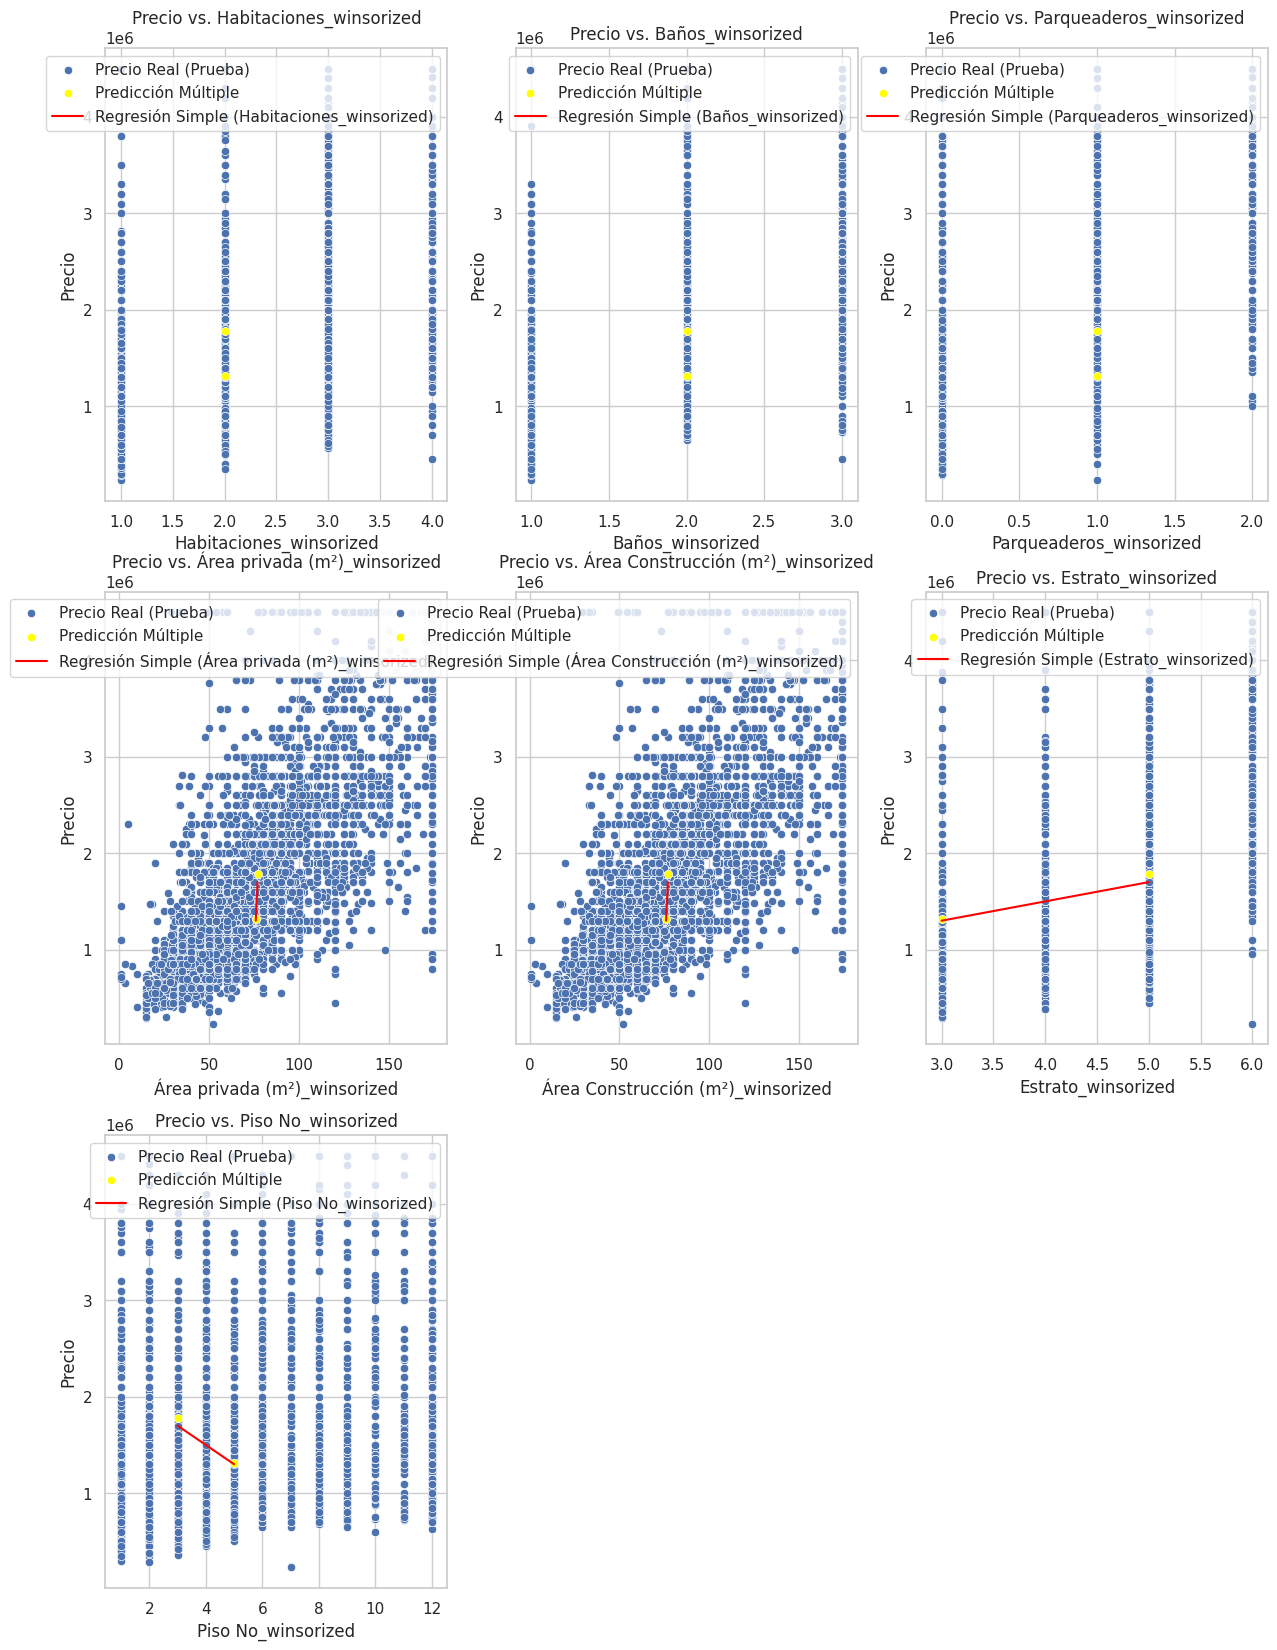

In [ ]:
#Gráfico de regresion RANSAC con toda la data completa
num_cols = len(x_2_complete_test.columns)
num_filas = 3
num_cols_por_fila = 3
total_subplots = num_filas * num_cols_por_fila

fig, axes = plt.subplots(num_filas, num_cols_por_fila, figsize=(15, 20))

for i, col in enumerate(x_2_complete_test.columns):
    fila = i // num_cols_por_fila
    columna = i % num_cols_por_fila
    ax = axes[fila, columna]

    sns.scatterplot(x=x_2_complete[col], y=y_2_complete, ax=ax, label='Precio Real (Prueba)')

    sns.scatterplot(x=x_2_complete_test[col], y=predicciones_ransac2, ax=ax, color='yellow', marker='o', label='Predicción Múltiple')

     # Ensure x_range is based on the test data range for plotting purposes
    x_range = np.linspace(x_2_complete_test[col].min(), x_2_complete_test[col].max(), 100)

    # Create a DataFrame with the correct column name for prediction
    x_range_df = pd.DataFrame({col: x_range})

    # Fit the simple model on the test data for plotting the simple regression line
    modelo_simple = sm.OLS(y_2_complete_test, sm.add_constant(x_2_complete_test[col])).fit()

    # Predict using the correctly structured DataFrame with constant
    y_pred_line = modelo_simple.predict(sm.add_constant(x_range_df, prepend=True)) # Use prepend=True explicitly

    ax.plot(x_range, y_pred_line, color='red', linestyle='-', label=f'Regresión Simple ({col})')


    ax.set_title(f'Precio vs. {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Precio')
    ax.legend()

# Ocultar los subplots vacíos si es necesario
if num_cols < total_subplots:
    for j in range(num_cols, total_subplots):
        fila = j // num_cols_por_fila
        columna = j % num_cols_por_fila
        fig.delaxes(axes[fila, columna])

##Regresión polinómica

###Variables con mayor correlacion

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [ ]:
#Definimos variables independientes ydependientes
x_3 = data_train[['Habitaciones_winsorized',
    'Baños_winsorized',
    'Parqueaderos_winsorized',
    'Área Construcción (m²)_winsorized',
    'Estrato_winsorized']]
y_3 = data_train['Precio_winsorized']

In [ ]:
#Definimos variables independientes ydependientes
x_3test = data_test[['Habitaciones_winsorized',
    'Baños_winsorized',
    'Parqueaderos_winsorized',
    'Área Construcción (m²)_winsorized',
    'Estrato_winsorized']]
y_3test = data_test['Precio_winsorized']

In [ ]:
grado = 2
poly_features = PolynomialFeatures(degree=grado, include_bias=False)
x_poly = poly_features.fit_transform(x_3)
x_poly_test = poly_features.fit_transform(x_3test)

In [ ]:
model_poly = LinearRegression()
model_poly.fit(x_poly, y_3)

LinearRegression()

In [ ]:
poly_predict = model_poly.predict(x_poly_test)

In [ ]:
precios_reales = y_3test.tolist()

print("Resultados:")
print("-----------------------------")

suma_precisiones = 0
total = len(precios_reales)

for real, predicho in zip(precios_reales, poly_predict):
    precision = 100 - (abs(real - predicho) / real * 100)
    suma_precisiones += precision
    print(f"Precio real: ${real:,.0f}")
    print(f"Precio predicho: ${predicho:,.2f}")
    print(f"Precisión: {precision:.2f}%")
    print("-----------------------------")

precision_promedio = suma_precisiones / total
print(f"✅ Precisión promedio del modelo: {precision_promedio:.2f}%")

Resultados:
-----------------------------
Precio real: $1,700,000
Precio predicho: $1,872,022.78
Precisión: 89.88%
-----------------------------
Precio real: $1,300,000
Precio predicho: $1,509,196.32
Precisión: 83.91%
-----------------------------
✅ Precisión promedio del modelo: 86.89%


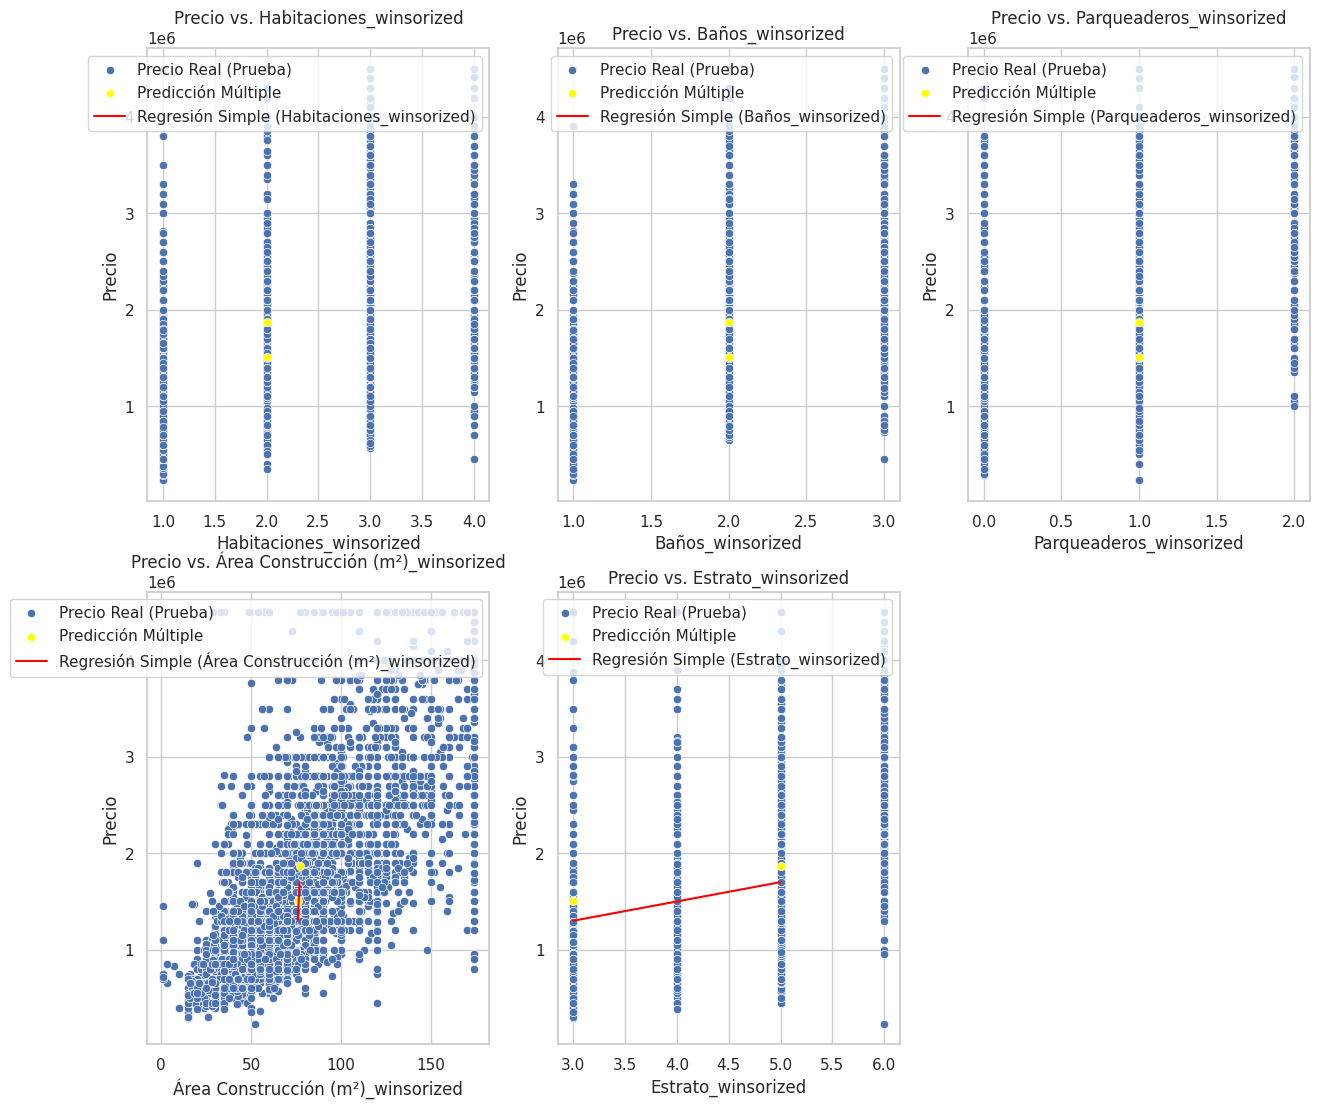

In [ ]:
#Gráfico de regresion polinómica con variables de mayor correlación
num_cols = len(x_3test.columns)
num_filas = 3
num_cols_por_fila = 3
total_subplots = num_filas * num_cols_por_fila

fig, axes = plt.subplots(num_filas, num_cols_por_fila, figsize=(15, 20))

for i, col in enumerate(x_3test.columns):
    fila = i // num_cols_por_fila
    columna = i % num_cols_por_fila
    ax = axes[fila, columna]

    sns.scatterplot(x=x_3[col], y=y_3, ax=ax, label='Precio Real (Prueba)')

    sns.scatterplot(x=x_3test[col], y=poly_predict, ax=ax, color='yellow', marker='o', label='Predicción Múltiple')


     # Ensure x_range is based on the test data range for plotting purposes
    x_range = np.linspace(x_3test[col].min(), x_3test[col].max(), 100)

    # Create a DataFrame with the correct column name for prediction
    x_range_df = pd.DataFrame({col: x_range})

    # Fit the simple model on the test data for plotting the simple regression line
    modelo_simple = sm.OLS(y_3test, sm.add_constant(x_3test[col])).fit()

    # Predict using the correctly structured DataFrame with constant
    y_pred_line = modelo_simple.predict(sm.add_constant(x_range_df, prepend=True)) # Use prepend=True explicitly

    ax.plot(x_range, y_pred_line, color='red', linestyle='-', label=f'Regresión Simple ({col})')


    ax.set_title(f'Precio vs. {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Precio')
    ax.legend()

# Ocultar los subplots vacíos si es necesario
if num_cols < total_subplots:
    for j in range(num_cols, total_subplots):
        fila = j // num_cols_por_fila
        columna = j % num_cols_por_fila
        fig.delaxes(axes[fila, columna])

###Data Completa

In [ ]:
#Definimos variables independientes ydependientes
x_3_complete = data_train[[
    'Habitaciones_winsorized',
    'Baños_winsorized',
    'Parqueaderos_winsorized',
    'Área privada (m²)_winsorized',
    'Área Construcción (m²)_winsorized',
    'Estrato_winsorized',
    'Piso No_winsorized']]
y_3_complete = data_train['Precio_winsorized']

In [ ]:
#Definimos variables independientes ydependientes
x_3_complete_test = data_test[[
    'Habitaciones_winsorized',
    'Baños_winsorized',
    'Parqueaderos_winsorized',
    'Área privada (m²)_winsorized',
    'Área Construcción (m²)_winsorized',
    'Estrato_winsorized',
    'Piso No_winsorized']]
y_3_complete_test = data_test['Precio_winsorized']

In [ ]:
grado = 2
poly_features_complete = PolynomialFeatures(degree=grado, include_bias=False)
x_complete_poly = poly_features_complete.fit_transform(x_3_complete)
x_complete_poly_test = poly_features_complete.fit_transform(x_3_complete_test)

In [ ]:
model_poly_complete = LinearRegression()
model_poly_complete.fit(x_complete_poly, y_3_complete)

LinearRegression()

In [ ]:
poly_complete_predict = model_poly_complete.predict(x_complete_poly_test)

In [ ]:
precios_reales = y_3_complete_test.tolist()

print("Resultados:")
print("-----------------------------")

suma_precisiones = 0
total = len(precios_reales)

for real, predicho in zip(precios_reales, poly_complete_predict):
    precision = 100 - (abs(real - predicho) / real * 100)
    suma_precisiones += precision
    print(f"Precio real: ${real:,.0f}")
    print(f"Precio predicho: ${predicho:,.2f}")
    print(f"Precisión: {precision:.2f}%")
    print("-----------------------------")

precision_promedio = suma_precisiones / total
print(f"✅ Precisión promedio del modelo: {precision_promedio:.2f}%")

Resultados:
-----------------------------
Precio real: $1,700,000
Precio predicho: $1,787,466.08
Precisión: 94.85%
-----------------------------
Precio real: $1,300,000
Precio predicho: $1,510,741.84
Precisión: 83.79%
-----------------------------
✅ Precisión promedio del modelo: 89.32%


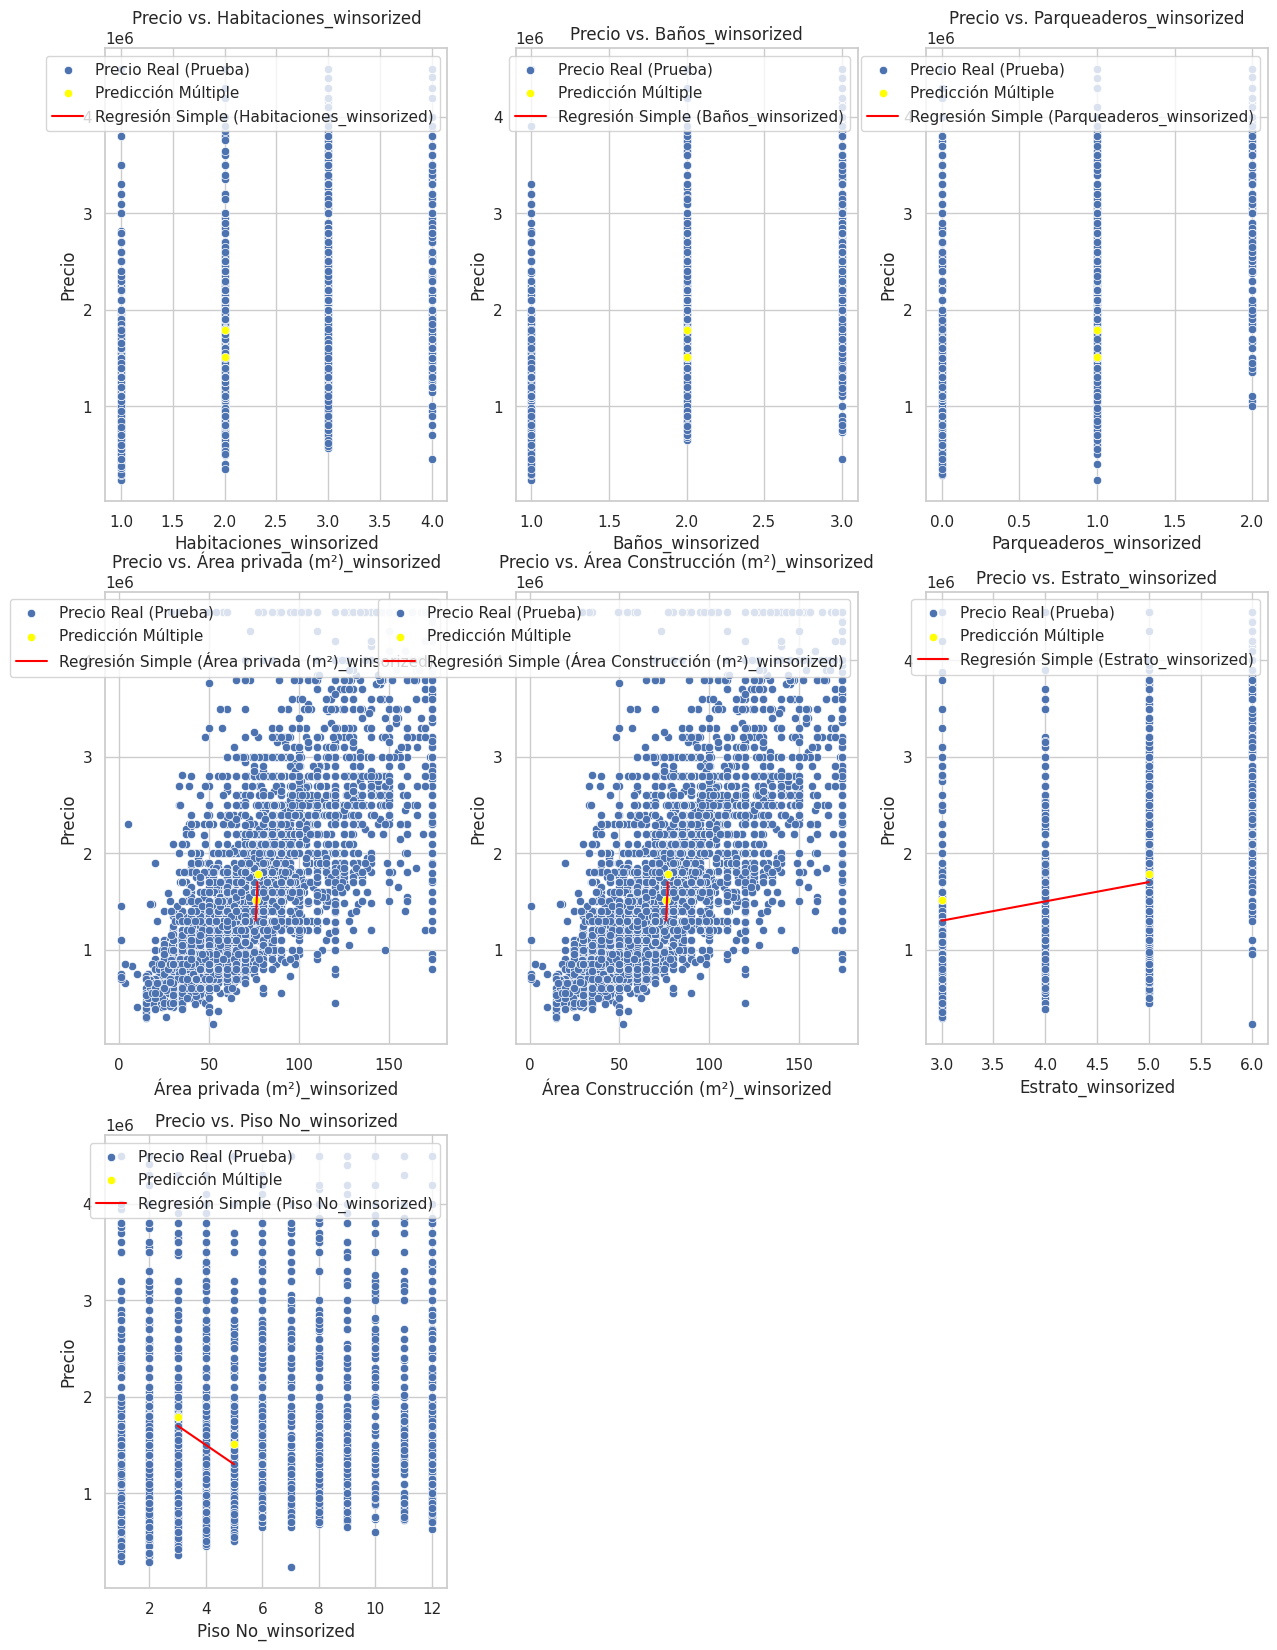

In [ ]:
#Gráfico de regresion polinómica con toda la data completa
num_cols = len(x_3_complete_test.columns)
num_filas = 3
num_cols_por_fila = 3
total_subplots = num_filas * num_cols_por_fila

fig, axes = plt.subplots(num_filas, num_cols_por_fila, figsize=(15, 20))

for i, col in enumerate(x_3_complete_test.columns):
    fila = i // num_cols_por_fila
    columna = i % num_cols_por_fila
    ax = axes[fila, columna]

    sns.scatterplot(x=x_3_complete[col], y=y_3_complete, ax=ax, label='Precio Real (Prueba)')

    sns.scatterplot(x=x_3_complete_test[col], y=poly_complete_predict, ax=ax, color='yellow', marker='o', label='Predicción Múltiple')


     # Ensure x_range is based on the test data range for plotting purposes
    x_range = np.linspace(x_3_complete_test[col].min(), x_3_complete_test[col].max(), 100)

    # Create a DataFrame with the correct column name for prediction
    x_range_df = pd.DataFrame({col: x_range})

    # Fit the simple model on the test data for plotting the simple regression line
    modelo_simple = sm.OLS(y_3_complete_test, sm.add_constant(x_3_complete_test[col])).fit()

    # Predict using the correctly structured DataFrame with constant
    y_pred_line = modelo_simple.predict(sm.add_constant(x_range_df, prepend=True)) # Use prepend=True explicitly

    ax.plot(x_range, y_pred_line, color='red', linestyle='-', label=f'Regresión Simple ({col})')


    ax.set_title(f'Precio vs. {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Precio')
    ax.legend()

# Ocultar los subplots vacíos si es necesario
if num_cols < total_subplots:
    for j in range(num_cols, total_subplots):
        fila = j // num_cols_por_fila
        columna = j % num_cols_por_fila
        fig.delaxes(axes[fila, columna])

#📉 Metricas del modelo

Necesito que el R^2 suba(indica que el modelo explica una buena parte de la varianza), el error típico RMSE baje (indicando que tus errores de predicción son pequeños)

In [ ]:
#Para regresión lineal simple
r2 = r2_score(y_test, predicciones_test)
rmse = np.sqrt(mean_squared_error(y_test, predicciones_test))

print(f"Coeficiente de determinación (R^2): {r2:.4f}")
print(f"Error cuadrático medio (RMSE): {rmse:.4f}")

Coeficiente de determinación (R^2): -1.0713
Error cuadrático medio (RMSE): 287838.7075


In [ ]:
#Para regresión lineal múltiple con variables de mayor correlación
r2 = r2_score(y_1test, predicciones_mlr1)
rmse = np.sqrt(mean_squared_error(y_1test, predicciones_mlr1))

print(f"Coeficiente de determinación (R^2): {r2:.4f}")
print(f"Error cuadrático medio (RMSE): {rmse:.4f}")

Coeficiente de determinación (R^2): -0.4714
Error cuadrático medio (RMSE): 242603.6759


In [ ]:
#Para regresión lineal múltiple con toda la data completa
r2 = r2_score(y_1_complete_test, predicciones_mlr2)
rmse = np.sqrt(mean_squared_error(y_1_complete_test, predicciones_mlr2))

print(f"Coeficiente de determinación (R^2): {r2:.4f}")
print(f"Error cuadrático medio (RMSE): {rmse:.4f}")

Coeficiente de determinación (R^2): -0.0257
Error cuadrático medio (RMSE): 202550.0109


In [ ]:
#Para regresión RANSAC con variables de mayor correlación
r2 = r2_score(y_2test, predicciones_ransac)
rmse = np.sqrt(mean_squared_error(y_2test, predicciones_ransac))

print(f"Coeficiente de determinación (R^2): {r2:.4f}")
print(f"Error cuadrático medio (RMSE): {rmse:.4f}")

Coeficiente de determinación (R^2): 0.7114
Error cuadrático medio (RMSE): 107448.8863


In [ ]:
#Para regresión RANSAC con toda la data completa
r2 = r2_score(y_2_complete_test, predicciones_ransac2)
rmse = np.sqrt(mean_squared_error(y_2_complete_test, predicciones_ransac2))

print(f"Coeficiente de determinación (R^2): {r2:.4f}")
print(f"Error cuadrático medio (RMSE): {rmse:.4f}")

Coeficiente de determinación (R^2): 0.9117
Error cuadrático medio (RMSE): 59439.2290


In [ ]:
#Para regresión polinómica con variables de mayor correlación
r2 = r2_score(y_3test, poly_predict)
rmse = np.sqrt(mean_squared_error(y_3test, poly_predict))

print(f"Coeficiente de determinación (R^2): {r2:.4f}")
print(f"Error cuadrático medio (RMSE): {rmse:.4f}")

Coeficiente de determinación (R^2): 0.0831
Error cuadrático medio (RMSE): 191513.6252


In [ ]:
#Para regresión polinómica con toda la data completa
r2 = r2_score(y_3_complete_test, poly_complete_predict)
rmse = np.sqrt(mean_squared_error(y_3_complete_test, poly_complete_predict))

print(f"Coeficiente de determinación (R^2): {r2:.4f}")
print(f"Error cuadrático medio (RMSE): {rmse:.4f}")

Coeficiente de determinación (R^2): 0.3492
Error cuadrático medio (RMSE): 161341.9355


#🧾 Conclusión
------

El mejor modelo es el mismo RANSAC pero con las varaibles de correlación. Esto se debe a que el modelo RANSAC con toda la data aunque tiene el mejor r2 score (0.9117) y RMSE (59439.2290), tiene una variable de Precio por metros cuadrados, lo cual puede afectar al modelo ya que indirectamente le estamos enviando el precio. Este posee un r2 score de 0.711, lo cual significa que el modelo explica el 71,11% de la variabilidad de los datos. También presenta un error cuadrático medio(RMSE) de la variable a predecir(precio) de 107448.8863 lo que indica, que en promedio, el cuadrado del error entre los precios predichos y los reales es de ~107,448 COP(Pesos colombianos).

# Conversion de Jupyter a HTML

In [ ]:
!jupyter nbconvert --to html "/content/TrafficML_JuanMonsalve.ipynb"